<a href="https://colab.research.google.com/github/Brianmuriuki/Capstone6366/blob/main/Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Libaries

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import yfinance as yf
from scipy.linalg import inv, det
from scipy.stats import chi2
import statsmodels.api as sm
!pip install pingouin
import pingouin as pg


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 2.8 MB/s eta 0:00:00


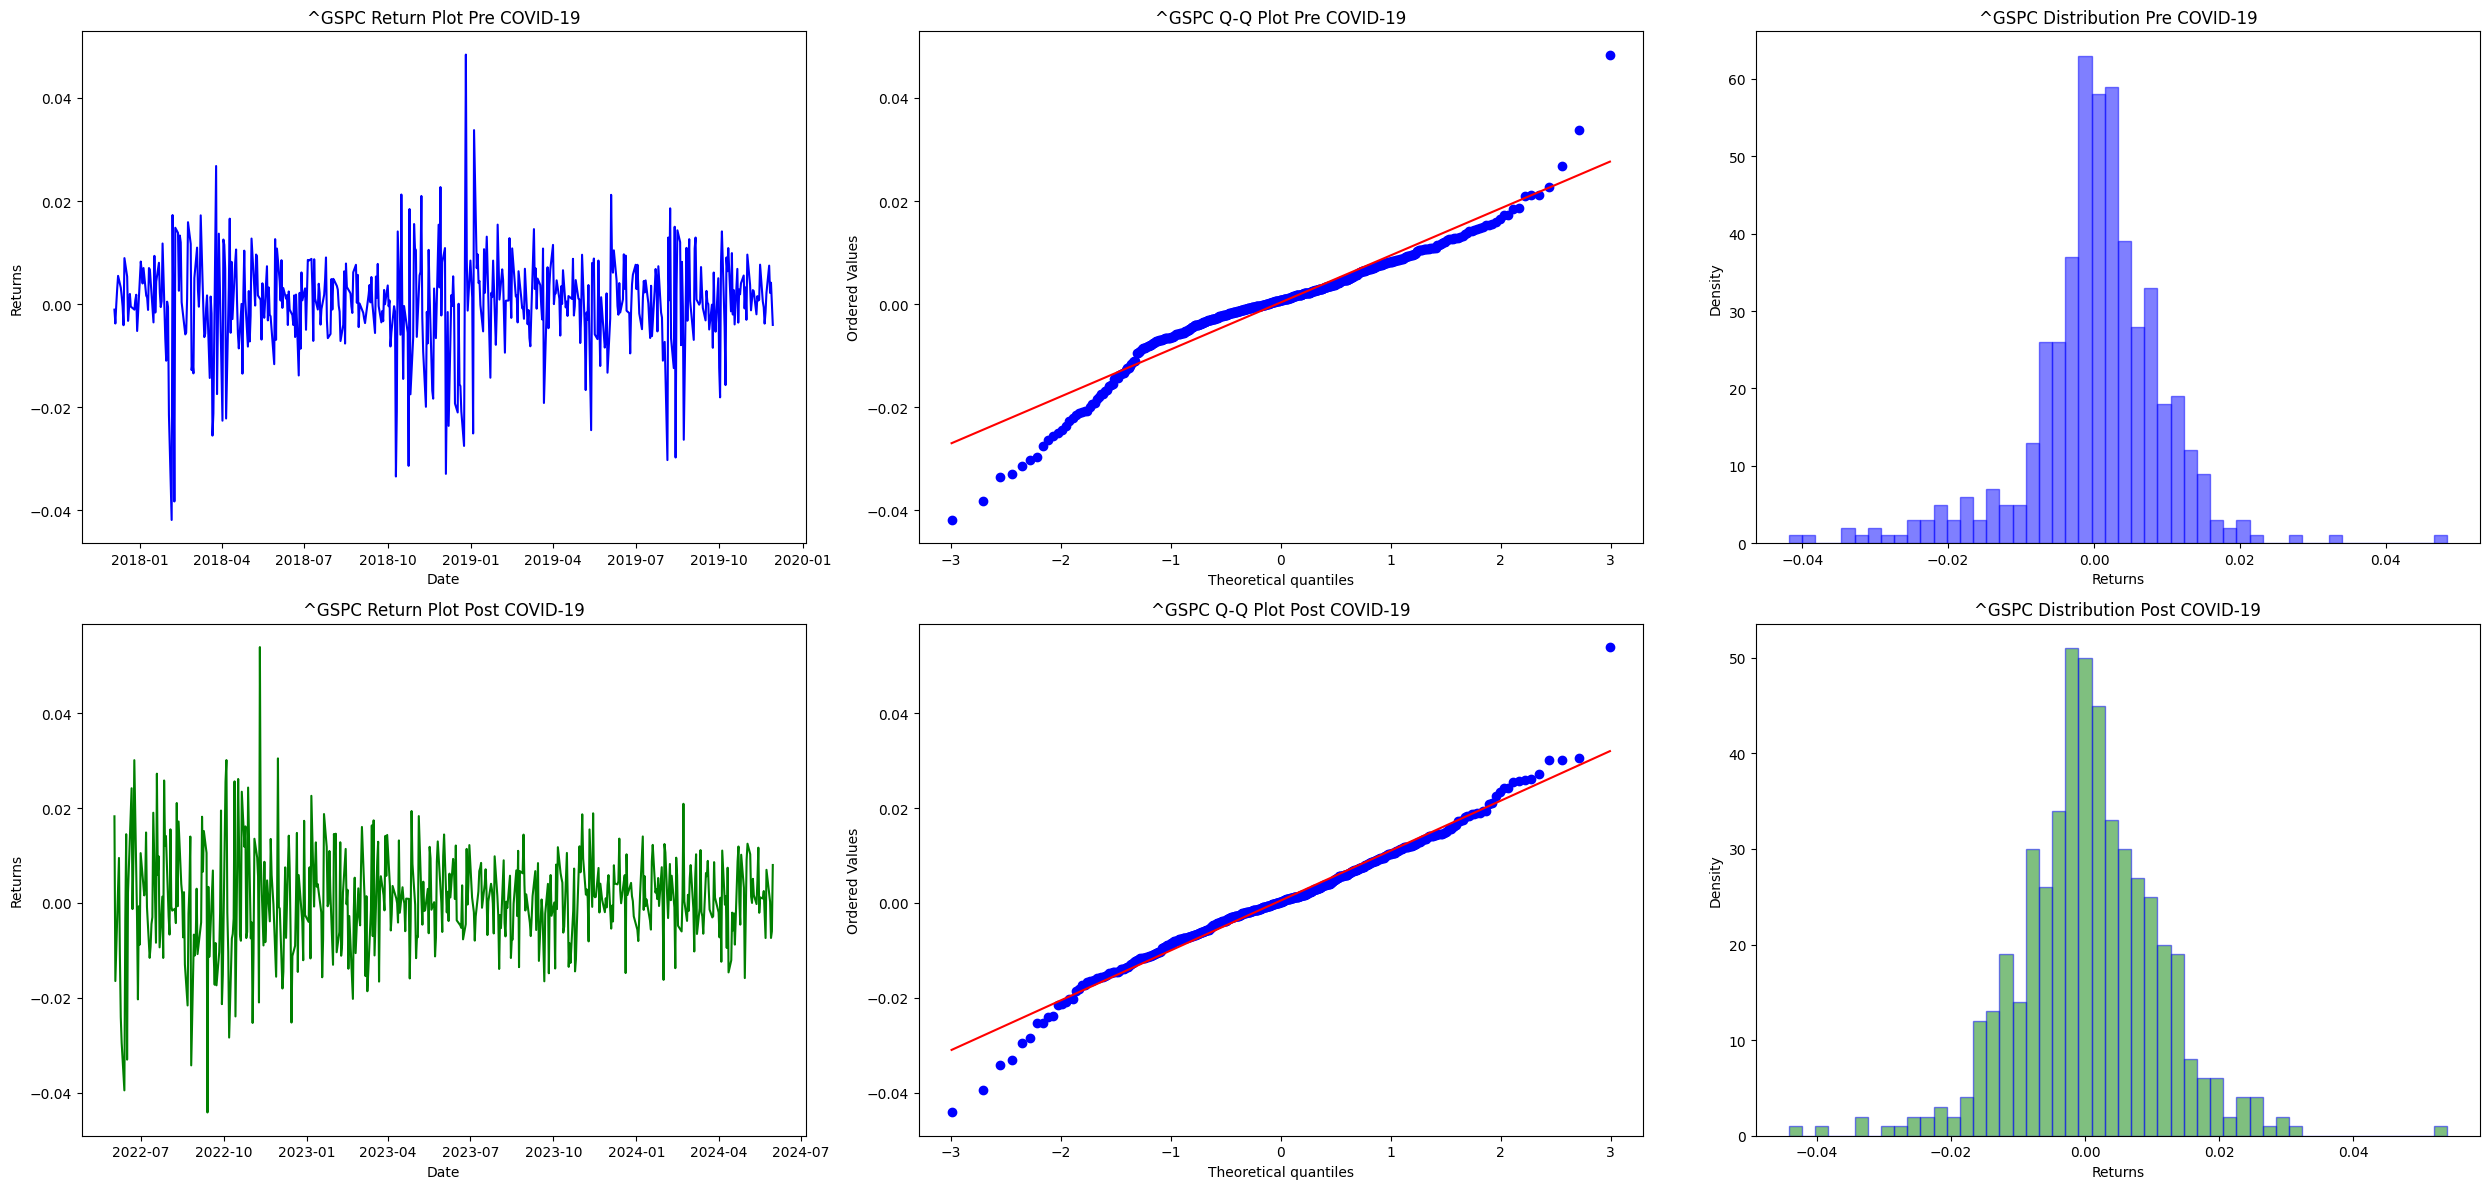

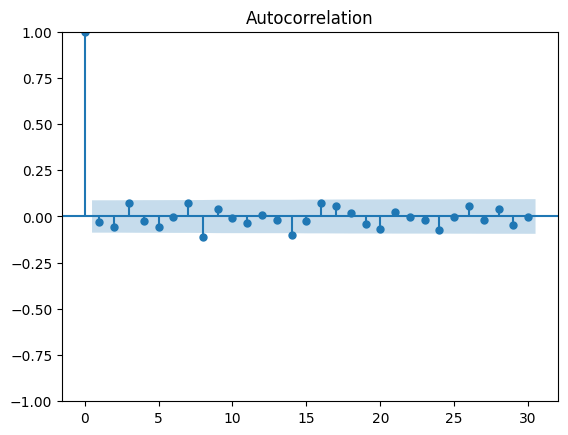

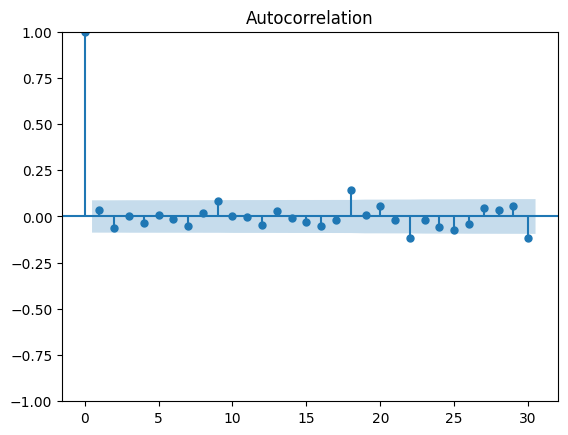

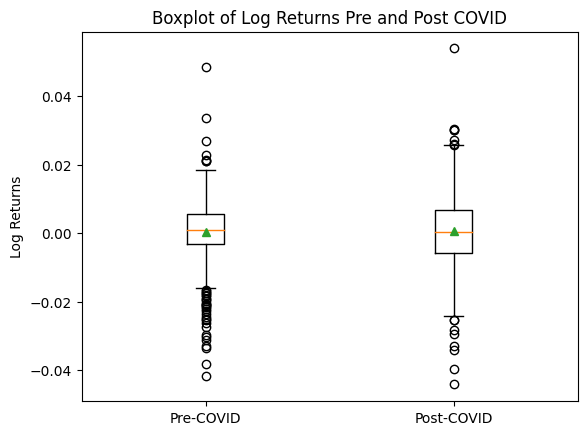

Statistics for ^GSPC:
Pre COVID-19:
  Mean: 0.000345
  Standard Deviation: 0.009
  Skewness: -0.609
  Kurtosis: 3.676
ADF Statistic: -22.962046188814334
p-value: 0.0
Post COVID-19:
  Mean: 0.001
  Standard Deviation: 0.011
  Skewness: -0.004


ValueError: Invalid format specifier

In [ ]:
# Returns / Partial Autocorrelation/ Q-Q Plots

# Yfinance tickers of assets tags Equities, FX, Bonds and Commodities
tickers = ["^GSPC","^FTSE", "^N225","USDEUR=X", "GBPEUR=X", "JPYEUR=X","CL=F","BZ=F","^FVX"]

# Dataframe for pre and post covid-periods
log_returns_pre_covid_list = []
log_returns_post_covid_list = []

for ticker in tickers:

    asset = yf.Ticker(ticker)

    # Data before COVID-19 2 years before COVID-19
    data_pre_covid = asset.history(start="2017-12-01", end="2019-12-01")
    data_pre_covid = data_pre_covid['Close']

    # Data after COVID-19 2 years after COVID-19
    data_post_covid = asset.history(start="2022-06-01", end="2024-06-01")
    data_post_covid = data_post_covid['Close']

    # Calculating log returns pre and post covid
    log_returns_pre_covid = np.log(1 + data_pre_covid.pct_change())
    log_returns_post_covid = np.log(1 + data_post_covid.pct_change())

    # Data cleaning  to remove na and non numeric values
    log_returns_pre_covid = log_returns_pre_covid.dropna()
    log_returns_post_covid = log_returns_post_covid.dropna()

    log_returns_pre_covid_list.append(log_returns_pre_covid)
    log_returns_post_covid_list.append(log_returns_post_covid)

    plt.figure(figsize=(25, 12))

    # Plotting returns and subplots
    plt.subplot(2, 3, 1)
    plt.plot(log_returns_pre_covid, color='b')
    plt.title(ticker + " Return Plot Pre COVID-19")
    plt.xlabel("Date")
    plt.ylabel("Returns")

    plt.subplot(2, 3, 2)
    # Prob plot to vsually check for normality
    stats.probplot(log_returns_pre_covid, dist="norm", plot=plt)
    plt.title(ticker + " Q-Q Plot Pre COVID-19")

    plt.subplot(2, 3, 3)
    plt.hist(log_returns_pre_covid, bins=50, color='b', alpha=.5, edgecolor='b')
    plt.title(ticker + " Distribution Pre COVID-19")
    plt.xlabel("Returns")
    plt.ylabel("Density")

    plt.subplot(2, 3, 4)
    plt.plot(log_returns_post_covid, color='g')
    plt.title(ticker + " Return Plot Post COVID-19")
    plt.xlabel("Date")
    plt.ylabel("Returns")

    plt.subplot(2, 3, 5)
    stats.probplot(log_returns_post_covid, dist="norm", plot=plt)
    plt.title(ticker + " Q-Q Plot Post COVID-19")

    plt.subplot(2, 3, 6)
    plt.hist(log_returns_post_covid, bins=50, color='g', alpha=.5, edgecolor='b')
    plt.title(ticker + " Distribution Post COVID-19")
    plt.xlabel("Returns")
    plt.ylabel("Density")

    plt.tight_layout()
    plt.show()



    # Generate autocorrelation plot of returns (pre and post covid )

    sm.graphics.tsa.plot_acf(log_returns_pre_covid, lags=30)

    plt.show()

    sm.graphics.tsa.plot_acf(log_returns_post_covid, lags=30)

    plt.show()

    # Box plot of pre and post covid returns

    data_plt = [log_returns_pre_covid, log_returns_post_covid]
    plt.boxplot(data_plt, showmeans=True)
    plt.xticks([1, 2], ['Pre-COVID', 'Post-COVID'])
    plt.title('Boxplot of Log Returns Pre and Post COVID')
    plt.ylabel('Log Returns')

    plt.show()

    # Calculate statistics (mean, stadard, skwe, kurt and stationarity )
    mean_pre = np.mean(log_returns_pre_covid)
    std_dev_pre = np.std(log_returns_pre_covid)
    skewness_pre = np.mean((log_returns_pre_covid - mean_pre) ** 3) / (std_dev_pre ** 3)
    kurtosis_pre = np.mean((log_returns_pre_covid - mean_pre) ** 4) / (std_dev_pre ** 4) - 3
    stationarity_pre=adfuller(log_returns_pre_covid)


    mean_post = np.mean(log_returns_post_covid)
    std_dev_post = np.std(log_returns_post_covid)
    skewness_post = np.mean((log_returns_post_covid - mean_post) ** 3) / (std_dev_post ** 3)
    kurtosis_post = np.mean((log_returns_post_covid - mean_post) ** 4) / (std_dev_post ** 4) - 3
    stationarity_post=adfuller(log_returns_post_covid)




    # Print results
    print(f"Statistics for {ticker}:")
    print("Pre COVID-19:")
    print(f"  Mean: {mean_pre:.6f}")
    print(f"  Standard Deviation: {std_dev_pre:.3f}")
    print(f"  Skewness: {skewness_pre:.3f}")
    print(f"  Kurtosis: {kurtosis_pre:.3f}")
    print(f"ADF Statistic: {stationarity_pre[0]}")
    print(f"p-value: {stationarity_pre[1]}")


    print("Post COVID-19:")
    print(f"  Mean: {mean_post:.3f}")
    print(f"  Standard Deviation: {std_dev_post:.3f}")
    print(f"  Skewness: {skewness_post:.3f}")
    print(f"  Kurtosis: {kurtosis_post:.3 f}")
    print(f"ADF Statistic: {stationarity_post[0]}")
    print(f"p-value: {stationarity_post[1]}")

    print()


plt.tight_layout()

[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  9 of 9 completed


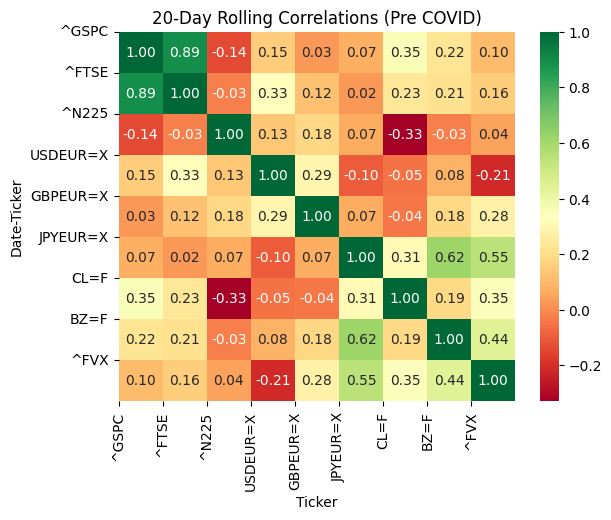

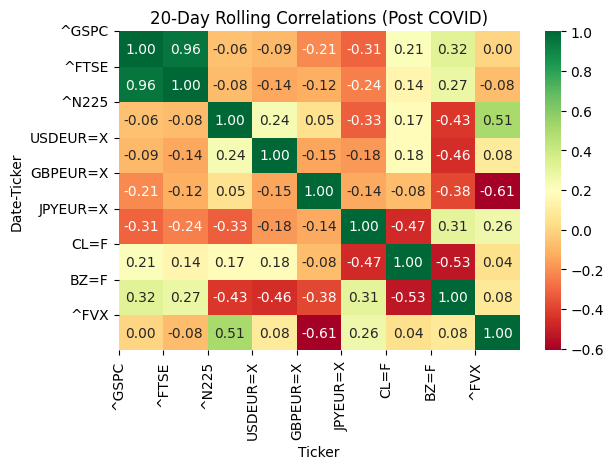

In [ ]:

# Correlation Structure

stocks = ["^GSPC","^FTSE", "^N225","USDEUR=X", "GBPEUR=X", "JPYEUR=X","CL=F","BZ=F","^FVX"]

# Pre and Post COVID
data = yf.download(stocks, start='2017-12-01', end='2019-12-01')['Adj Close']
data_2 = yf.download(stocks, start='2022-06-01', end='2024-06-01')['Adj Close']



rets = (1+data.pct_change())
rets_2 = (1+data_2.pct_change())

#  20-day rolling correlation
corr_20_day = rets.rolling(window=20).corr()
corr_20_day_2 = rets_2.rolling(window=20).corr()


corr_matrix = corr_20_day.iloc[-len(stocks):]
corr_matrix_2 = corr_20_day_2.iloc[-len(stocks):]



sns.heatmap(corr_matrix, cmap='RdYlGn', annot=True, fmt=".2f")

plt.title('20-Day Rolling Correlations (Pre COVID)')

plt.xticks(ticks=range(len(stocks)), labels=stocks, rotation='vertical')
plt.yticks(ticks=range(len(stocks)), labels=stocks, rotation='horizontal')

plt.show()


sns.heatmap(corr_matrix_2, cmap='RdYlGn', annot=True, fmt=".2f")
plt.title('20-Day Rolling Correlations (Post COVID)')
plt.xticks(ticks=range(len(stocks)), labels=stocks, rotation='vertical')
plt.yticks(ticks=range(len(stocks)), labels=stocks, rotation='horizontal')
# prevents overlaps

plt.tight_layout()
plt.show()



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


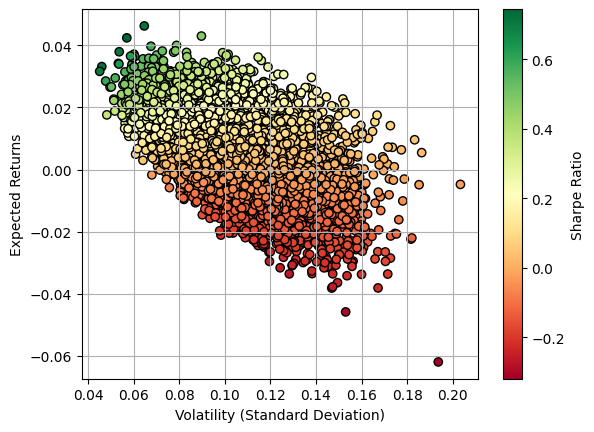

Portfolio with Maximum Sharpe Ratio:
       Returns  Volatility  Sharpe Ratio  ^GSPC Weight  ^FTSE Weight  \
7632  0.042395    0.056966      0.744214      0.197368      0.035371   

      ^N225 Weight  USDEUR=X Weight  GBPEUR=X Weight  JPYEUR=X Weight  \
7632      0.039319         0.255149         0.110434         0.264504   

      CL=F Weight  BZ=F Weight  ^FVX Weight  
7632     0.000501     0.092091     0.005263  

Portfolio with Minimum Volatility:
       Returns  Volatility  Sharpe Ratio  ^GSPC Weight  ^FTSE Weight  \
5684  0.031628    0.045064      0.701843      0.074887      0.092736   

      ^N225 Weight  USDEUR=X Weight  GBPEUR=X Weight  JPYEUR=X Weight  \
5684       0.07576         0.169443         0.250022         0.279303   

      CL=F Weight  BZ=F Weight  ^FVX Weight  
5684     0.006173     0.048234      0.00344  


In [ ]:
# Asset Allocation

assets= ["^GSPC","^FTSE", "^N225","USDEUR=X", "GBPEUR=X", "JPYEUR=X","CL=F","BZ=F","^FVX"]


risk_free_rate = 0.0


pf_data = pd.DataFrame()

# Pre Covid
start= "2017-12-1"
end= "2019-12-01"


for a in assets:
    pf_data[a] =  yf.download(a, start=start,end=end)['Adj Close']

    log_returns = np.log(pf_data / pf_data.shift(1))

num_assets = len(assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights


# Expected return
m=np.sum(weights * log_returns.mean()) * 250

# Expected Variance
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

# Expected volatility
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))



pf_returns = []
pf_volatilities = []
sharpe_ratio = []
portfolio_weights = []

for x in range (10000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    portfolio_stddev= np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))
    sharpe_ratio.append(((np.sum(weights * log_returns.mean()) * 250) - risk_free_rate) / portfolio_stddev)
    portfolio_weights.append(weights)

pf_returns, pf_volatilities,sharpe_ratio

pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)

pf_returns, pf_volatilities

# Create a dictionary to store portfolio data
portfolio_data = {
    'Returns': pf_returns,
    'Volatility': pf_volatilities,
    'Sharpe Ratio': sharpe_ratio
}

# Add portfolio weights to the dictionary
for i, symbol in enumerate(assets):
    portfolio_data[symbol + ' Weight'] = [weight[i] for weight in portfolio_weights]

# Create a DataFrame from the portfolio data
df = pd.DataFrame(portfolio_data)

# Define the column order for the DataFrame
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [symbol + ' Weight' for symbol in assets]


# Plot the efficient frontier

plt.scatter(x=df['Volatility'], y=df['Returns'], c=df['Sharpe Ratio'], cmap='RdYlGn', marker='o',edgecolors='black')
plt.colorbar(label='Sharpe Ratio')  # Optional: Add a colorbar
plt.grid(True)
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Returns')
plt.show()


# Sharpe ratio
max_sharpe_portfolio = df[df['Sharpe Ratio'] == df['Sharpe Ratio'].max()]

#  minimum volatility
min_volatility_portfolio = df[df['Volatility'] == df['Volatility'].min()]

# portfolios details
print("Portfolio with Maximum Sharpe Ratio:")
print(max_sharpe_portfolio)

print("\nPortfolio with Minimum Volatility:")
print(min_volatility_portfolio)




[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


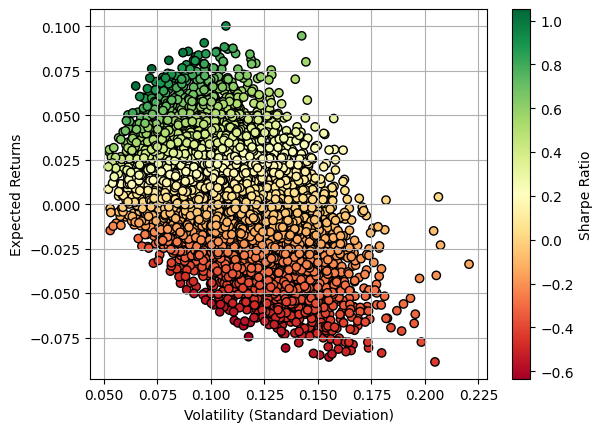

Portfolio with Maximum Sharpe Ratio:
       Returns  Volatility  Sharpe Ratio  ^GSPC Weight  ^FTSE Weight  \
2456  0.076127     0.07235      1.052195      0.238338      0.007105   

      ^N225 Weight  USDEUR=X Weight  GBPEUR=X Weight  JPYEUR=X Weight  \
2456      0.269033         0.065604         0.260048         0.036632   

      CL=F Weight  BZ=F Weight  ^FVX Weight  
2456     0.017031     0.010797     0.095412  

Portfolio with Minimum Volatility:
       Returns  Volatility  Sharpe Ratio  ^GSPC Weight  ^FTSE Weight  \
9556  0.021026    0.052066      0.403832      0.071429      0.084184   

      ^N225 Weight  USDEUR=X Weight  GBPEUR=X Weight  JPYEUR=X Weight  \
9556      0.180207          0.30976         0.257124         0.034441   

      CL=F Weight  BZ=F Weight  ^FVX Weight  
9556     0.003612     0.054962     0.004281  


In [ ]:
# Asset allocation
assets= ["^GSPC","^FTSE", "^N225","USDEUR=X", "GBPEUR=X", "JPYEUR=X","CL=F","BZ=F","^FVX"]


risk_free_rate = 0.0


pf_data = pd.DataFrame()

# Post Covid
start= "2022-06-1"
end= "2024-06-01"


for a in assets:
    pf_data[a] =  yf.download(a, start=start,end=end)['Adj Close']

    log_returns = np.log(pf_data / pf_data.shift(1))

num_assets = len(assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights


# Expected return
m=np.sum(weights * log_returns.mean()) * 250

# Expected Variance
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

# Expected volatility
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))



pf_returns = []
pf_volatilities = []
sharpe_ratio = []
portfolio_weights = []

for x in range (10000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    portfolio_stddev= np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))
    sharpe_ratio.append(((np.sum(weights * log_returns.mean()) * 250) - risk_free_rate) / portfolio_stddev)
    portfolio_weights.append(weights)

pf_returns, pf_volatilities,sharpe_ratio

pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)

pf_returns, pf_volatilities

# Create a dictionary to store portfolio data
portfolio_data = {
    'Returns': pf_returns,
    'Volatility': pf_volatilities,
    'Sharpe Ratio': sharpe_ratio
}

# Add portfolio weights to the dictionary
for i, symbol in enumerate(assets):
    portfolio_data[symbol + ' Weight'] = [weight[i] for weight in portfolio_weights]

# Create a DataFrame from the portfolio data
df = pd.DataFrame(portfolio_data)

# Define the column order for the DataFrame
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [symbol + ' Weight' for symbol in assets]


# Plot the efficient frontier

plt.scatter(x=df['Volatility'], y=df['Returns'], c=df['Sharpe Ratio'], cmap='RdYlGn', marker='o',edgecolors='black')
plt.colorbar(label='Sharpe Ratio')  # Optional: Add a colorbar
plt.grid(True)
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Returns')
plt.show()


# Sharpe ratio
max_sharpe_portfolio = df[df['Sharpe Ratio'] == df['Sharpe Ratio'].max()]

#  minimum volatility
min_volatility_portfolio = df[df['Volatility'] == df['Volatility'].min()]

# portfolios details
print("Portfolio with Maximum Sharpe Ratio:")
print(max_sharpe_portfolio)

print("\nPortfolio with Minimum Volatility:")
print(min_volatility_portfolio)




[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  9 of 9 completed


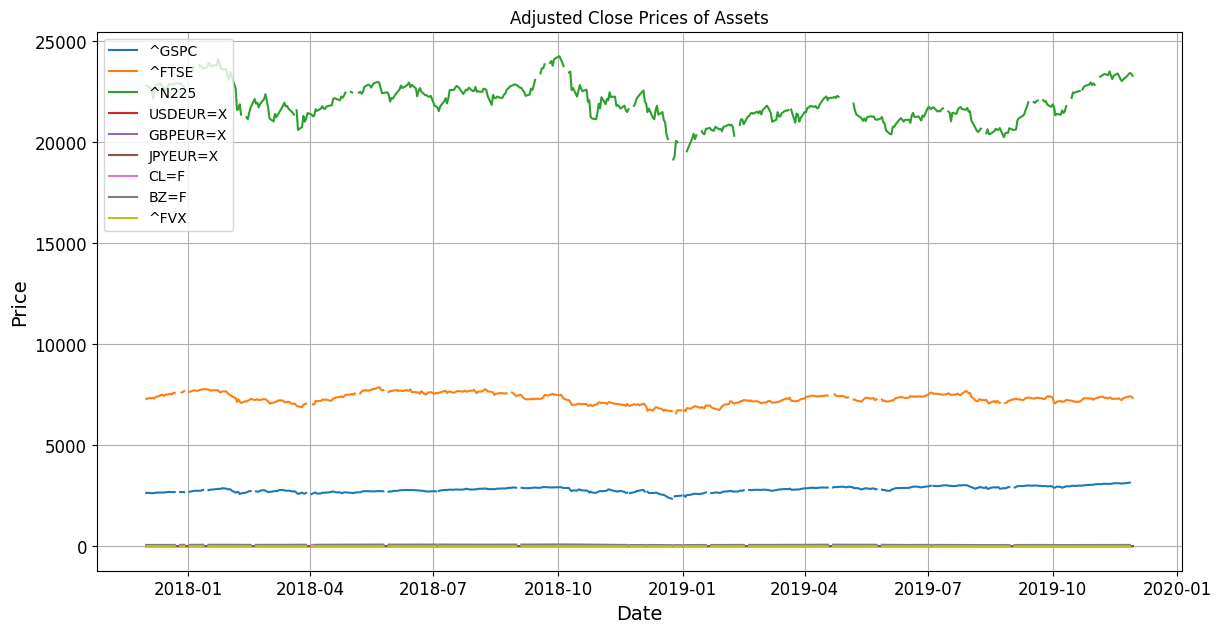

Summary Statistics pre covid:
Ticker        BZ=F        CL=F    GBPEUR=X    JPYEUR=X    USDEUR=X  \
count   520.000000  520.000000  520.000000  520.000000  520.000000   
mean     -0.000032   -0.000108    0.000059    0.000202    0.000149   
std       0.019158    0.020223    0.004206    0.004676    0.003912   
min      -0.076583   -0.082336   -0.018114   -0.014361   -0.012396   
25%      -0.007654   -0.009842   -0.002214   -0.002533   -0.002263   
50%       0.000442    0.000977   -0.000058    0.000000   -0.000006   
75%       0.009635    0.010501    0.002374    0.002609    0.002569   
max       0.136392    0.136944    0.017260    0.033025    0.020638   

Ticker       ^FTSE        ^FVX       ^GSPC       ^N225  
count   520.000000  520.000000  520.000000  520.000000  
mean      0.000012   -0.000514    0.000333    0.000040  
std       0.007496    0.019536    0.009259    0.010290  
min      -0.032842   -0.094335   -0.041843   -0.051405  
25%      -0.004353   -0.010184   -0.003030   -0.004663

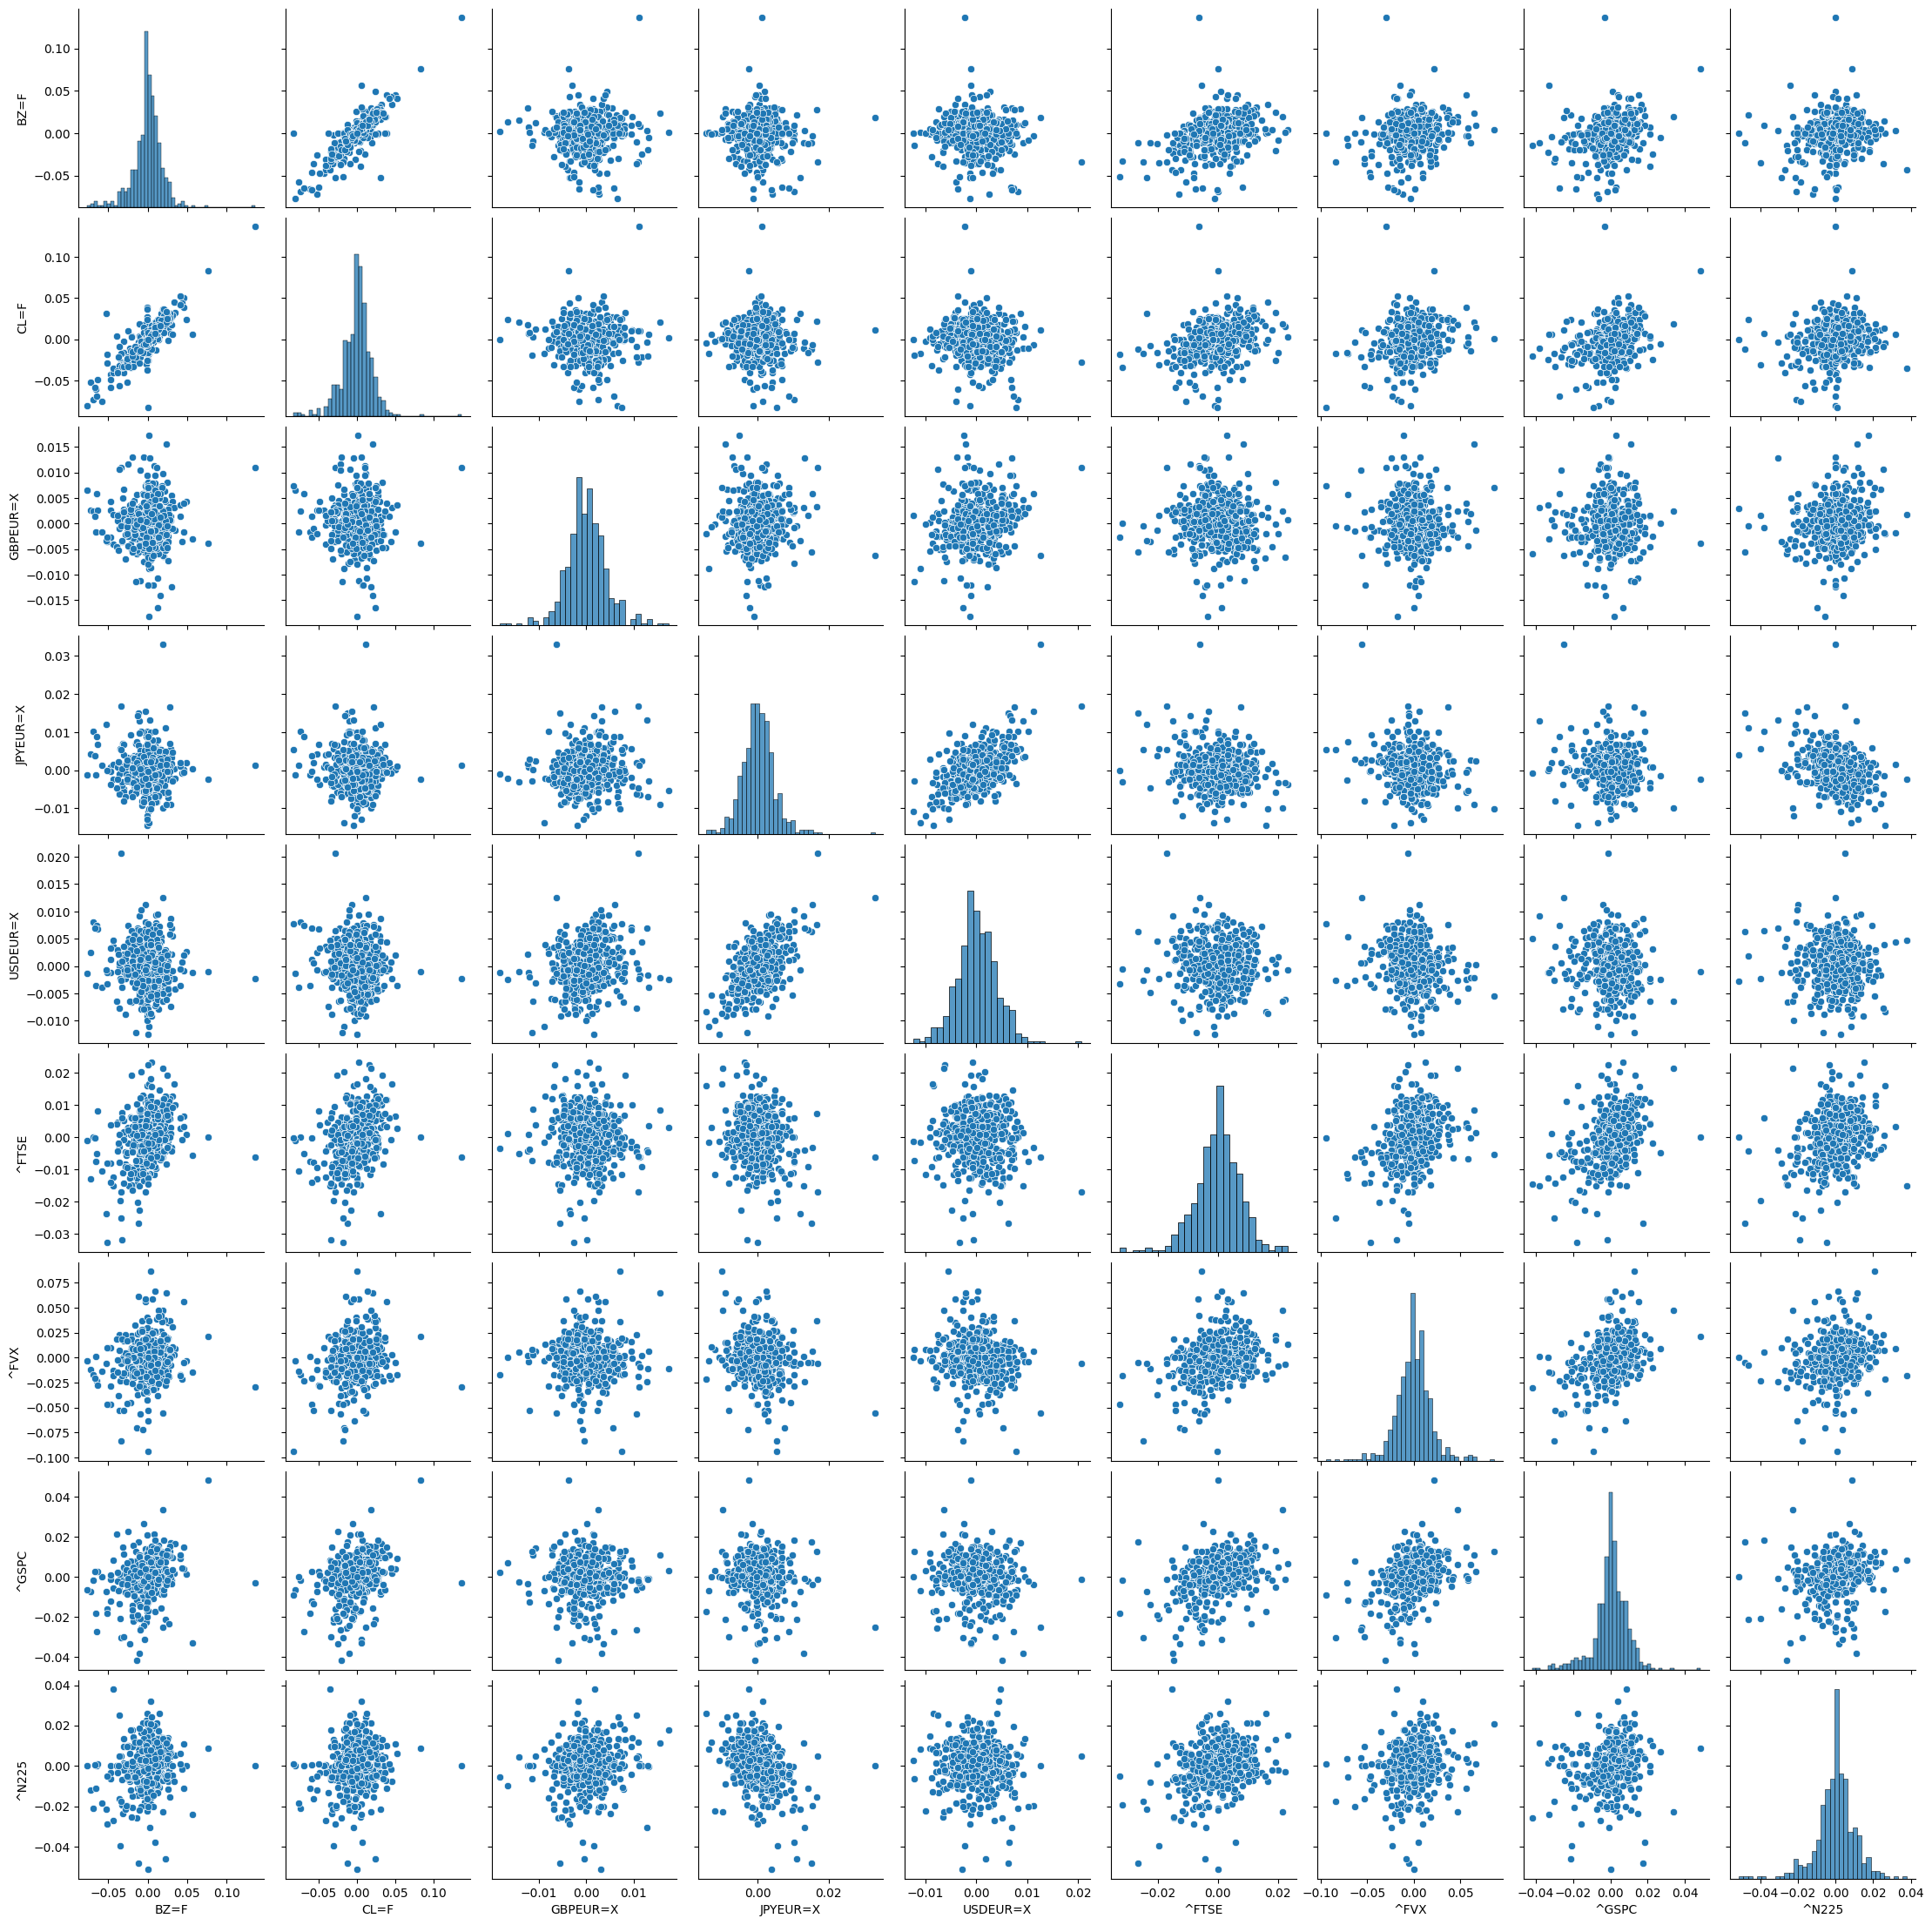

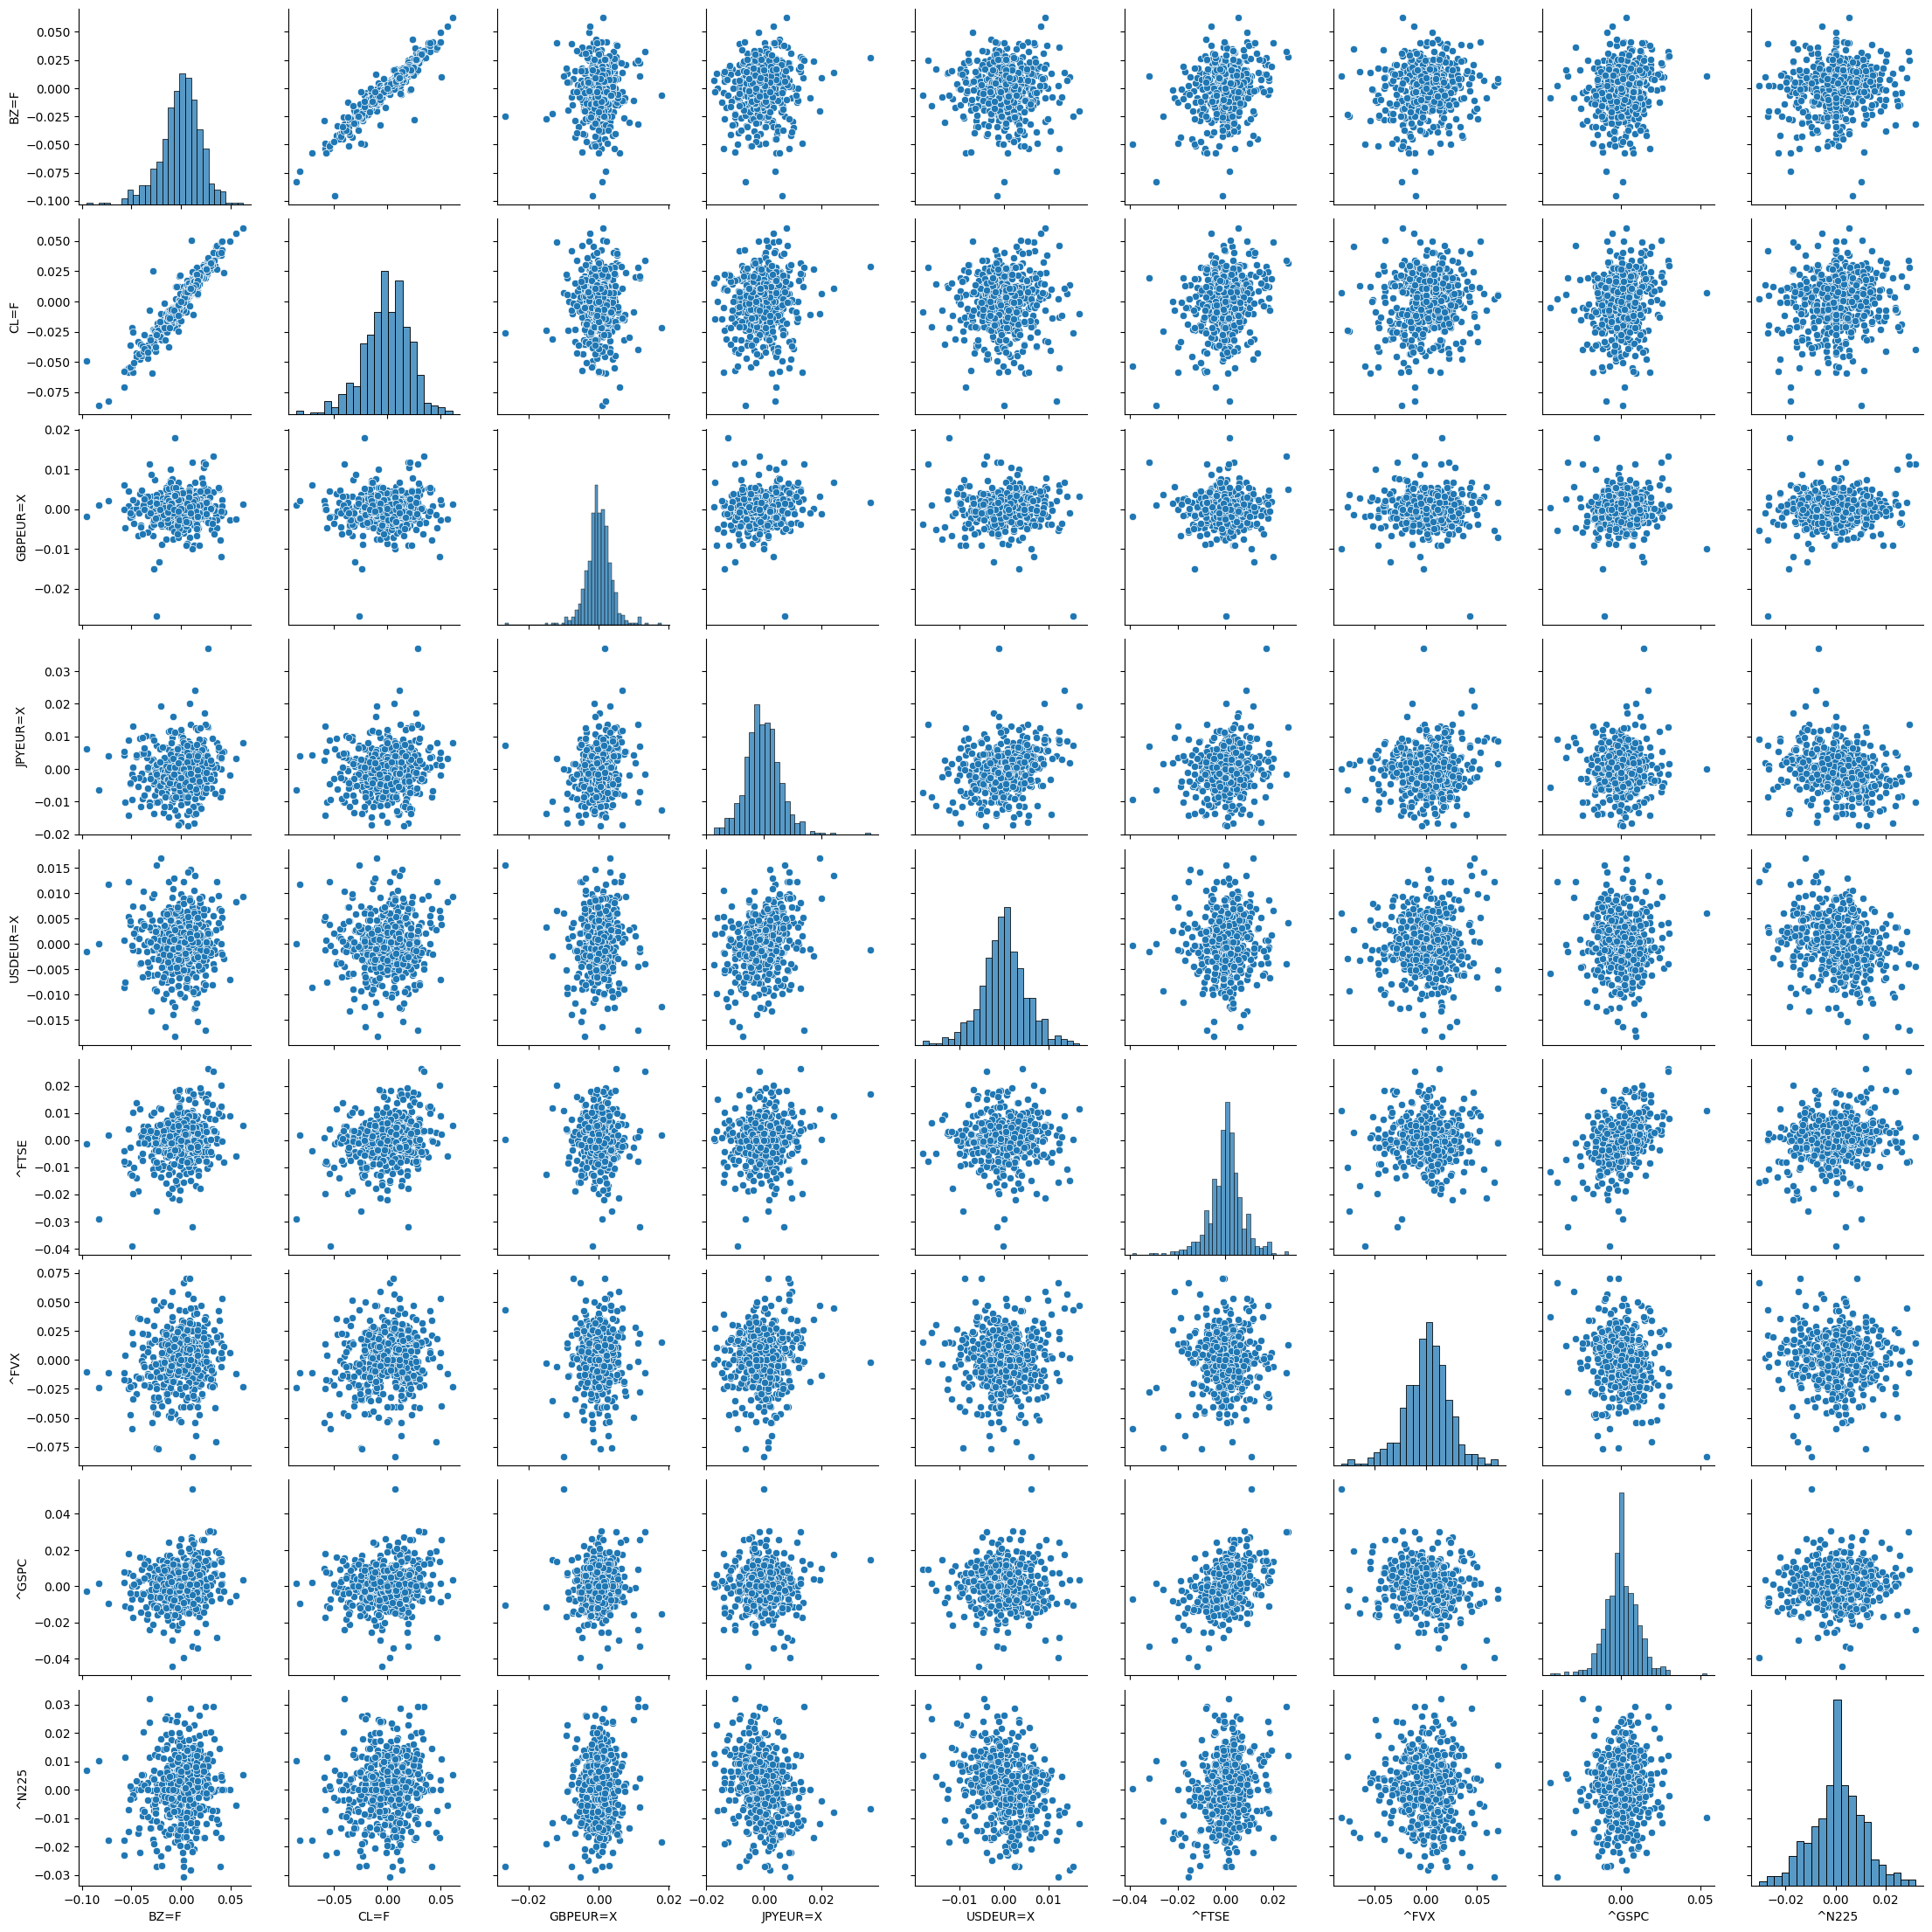

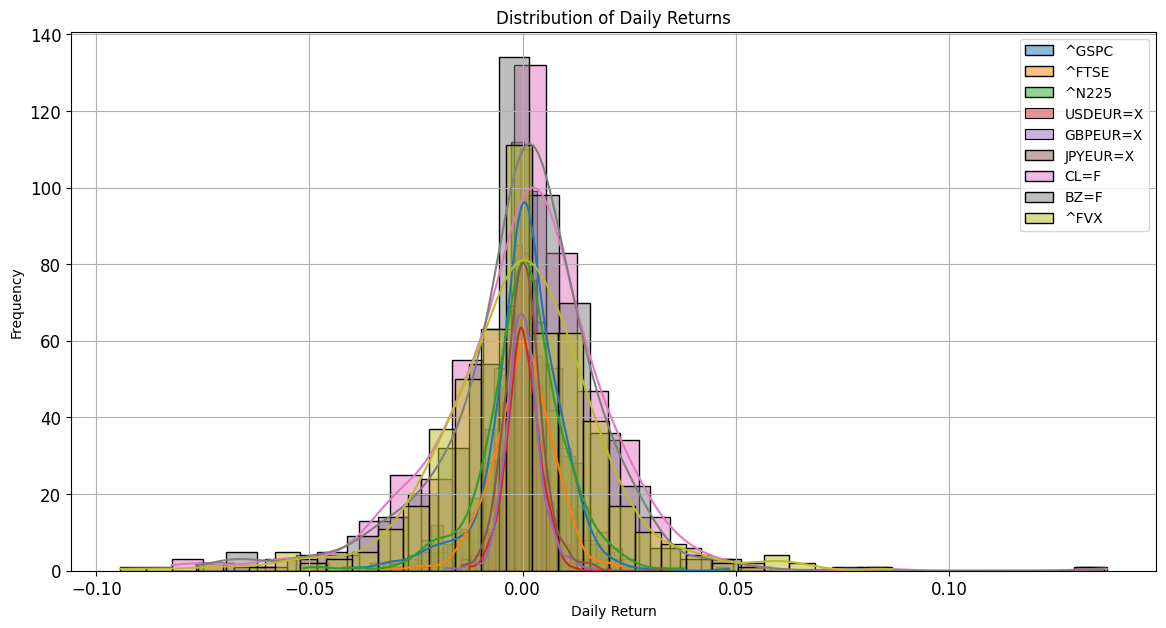

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


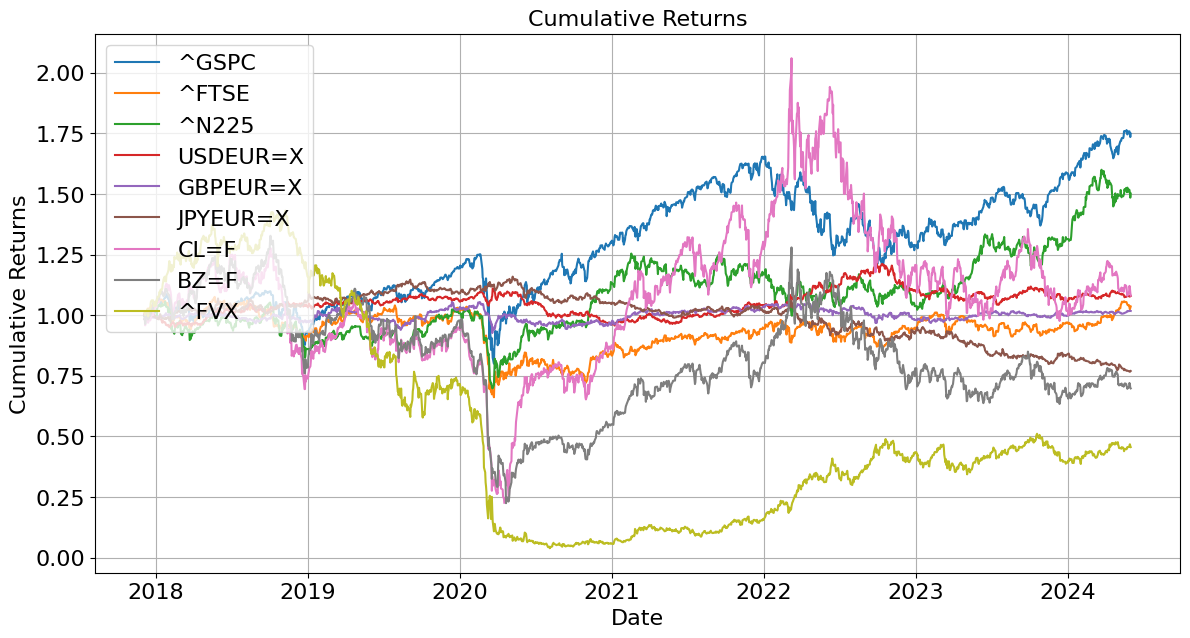

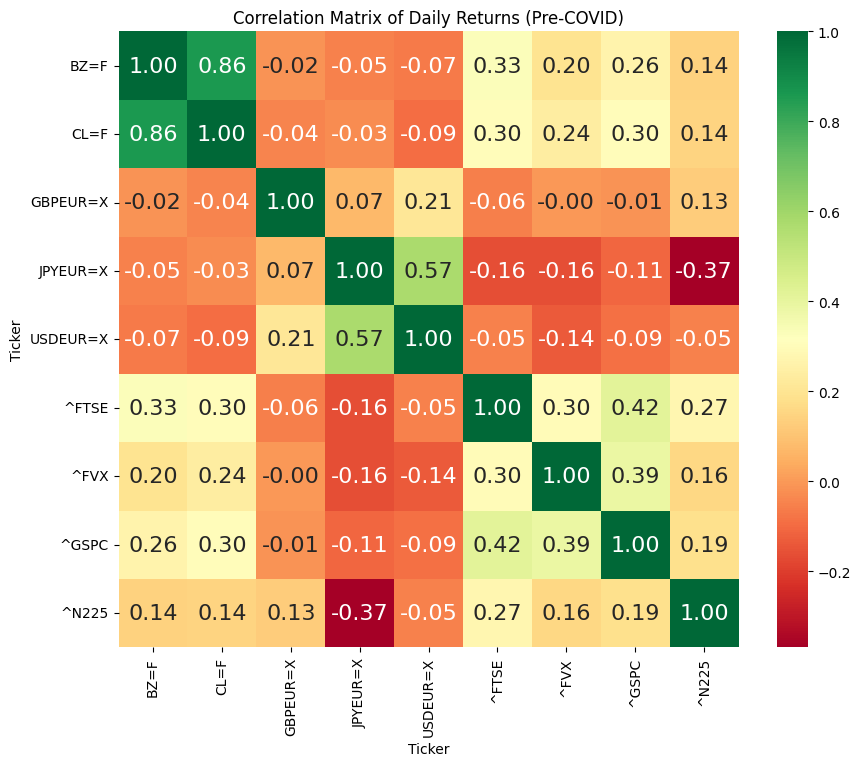

<Figure size 640x480 with 0 Axes>

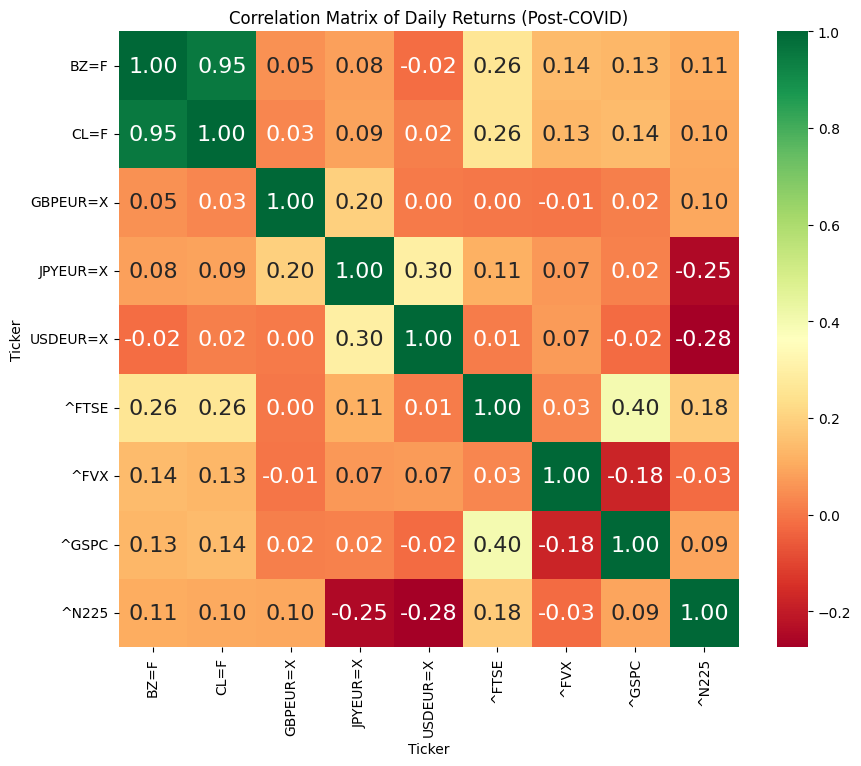

<Figure size 640x480 with 0 Axes>

In [ ]:
# EQuities

# data=o pre_Covid_Data and data_2= post covid data
tickers =  ["^GSPC","^FTSE", "^N225","USDEUR=X", "GBPEUR=X", "JPYEUR=X","CL=F","BZ=F","^FVX"]
data_0 = yf.download(tickers, start="2017-12-01", end="2024-06-01")['Adj Close']
data = yf.download(tickers, start="2017-12-01", end="2019-12-01")['Adj Close']
data_2 = yf.download(tickers, start="2022-06-01", end="2024-06-01")['Adj Close']



plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(data.index, data[ticker], label=ticker)

plt.title('Adjusted Close Prices of Assets')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()



# Log returns and data cleaning -dropping nas
returns = np.log(1+data.pct_change().dropna())
returns_2 = np.log(1+data_2.pct_change().dropna())

# EDA of prea and posy covid data
print("Summary Statistics pre covid:")
print(returns.describe())
print("Summary Statistics post covid:")
print(returns_2.describe())

sns.pairplot(returns)
plt.show()

sns.pairplot(returns_2)
plt.show()

plt.figure(figsize=(14, 7))
for ticker in tickers:
    sns.histplot(returns[ticker], bins=30, kde=True, label=ticker)

plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()


# Cummulative returns (Entire period)
returns_0 = np.log(1+data_0.pct_change().dropna())
cumulative_returns = (1 + returns_0).cumprod()
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(cumulative_returns.index, cumulative_returns[ticker], label=ticker)

plt.xlabel('Date', fontsize=16)
plt.ylabel('Cumulative Returns', fontsize=16)
plt.title('Cumulative Returns', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='upper left',fontsize=16)
plt.grid(True)
plt.show()

# Correlation analysis
correlation_matrix = returns.corr()
correlation_matrix_2 = returns_2.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, cmap='RdYlGn', annot=True, fmt=".2f", cbar=True,annot_kws={"size": 16})

plt.title('Correlation Matrix of Daily Returns (Pre-COVID)')
plt.show()
# prevents overlaps

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix_2, cmap='RdYlGn', annot=True, fmt=".2f", cbar=True,annot_kws={"size": 16})

plt.title('Correlation Matrix of Daily Returns (Post-COVID)')
plt.show()
# prevents overlaps

plt.tight_layout()
plt.show()


[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  9 of 9 completed


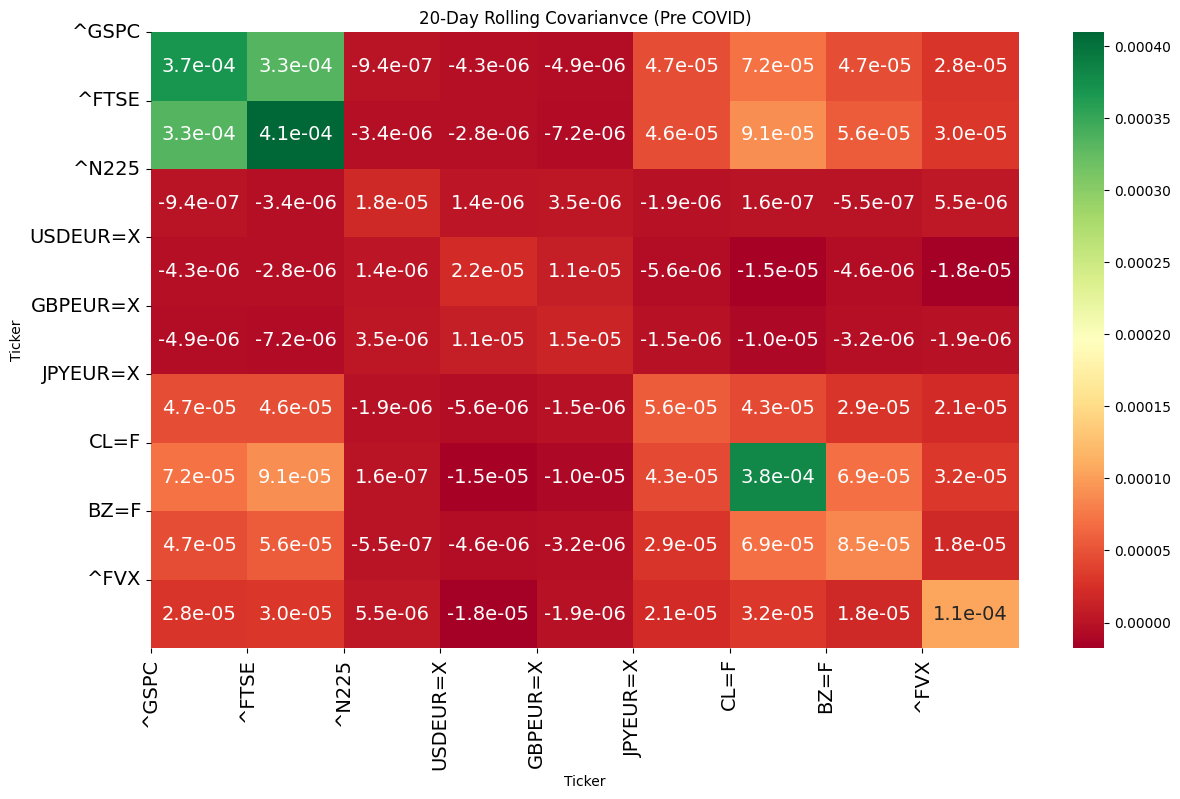

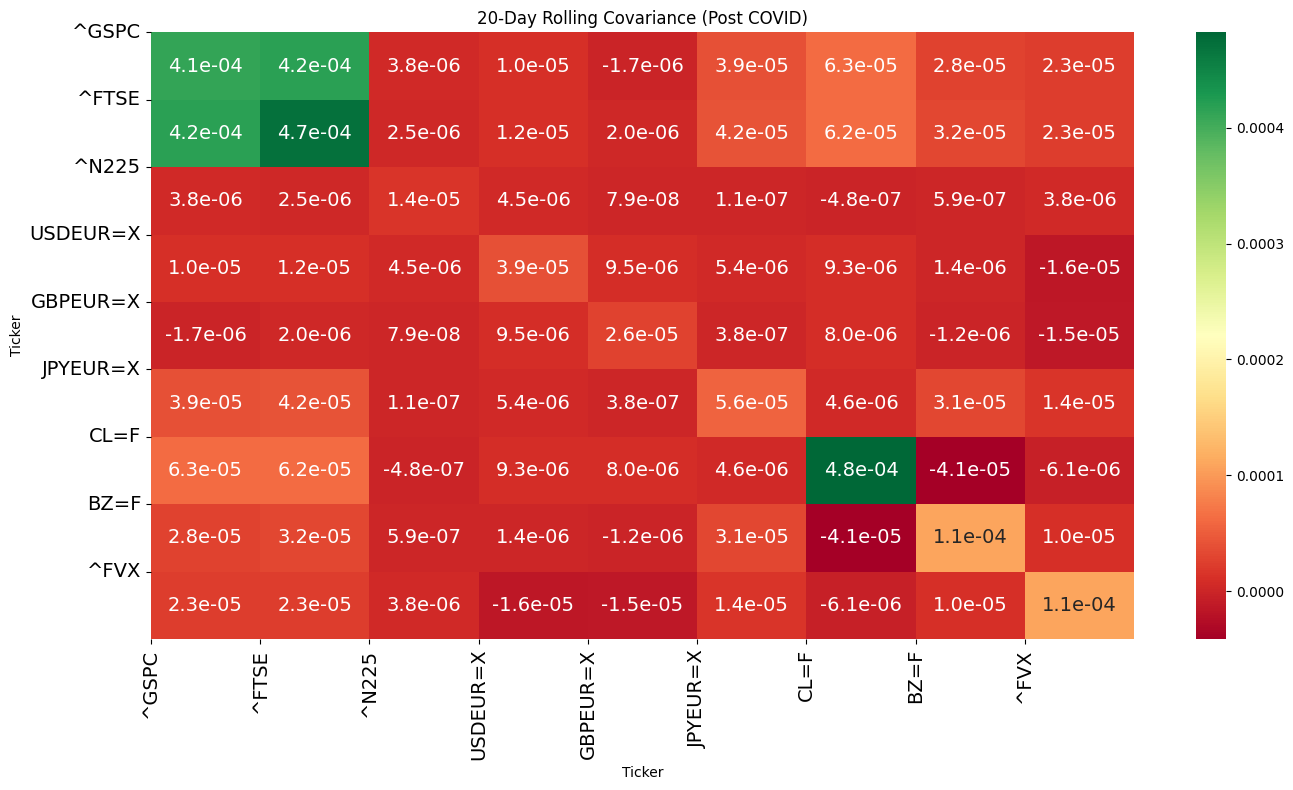

In [ ]:

# Covariance

stocks = ["^GSPC","^FTSE", "^N225","USDEUR=X", "GBPEUR=X", "JPYEUR=X","CL=F","BZ=F","^FVX"]

# Pre and Post COVID
data = yf.download(stocks, start='2017-12-01', end='2019-12-01')['Adj Close']
data_2 = yf.download(stocks, start='2022-06-01', end='2024-06-01')['Adj Close']




rets = (1+data.pct_change())
rets_2 = (1+data_2.pct_change())

'''
#  20-day rolling correlation
cov_20_day = rets.rolling(window=20).cov()
cov_20_day_2 = rets_2.rolling(window=20).cov()
'''
#  20-day rolling correlation
cov_20_day = rets.cov()
cov_20_day_2 = rets_2.cov()
cov_matrix = cov_20_day.iloc[-len(stocks):]
cov_matrix_2 = cov_20_day_2.iloc[-len(stocks):]


plt.figure(figsize=(14, 8))

sns.heatmap(cov_matrix, cmap='RdYlGn',  annot=True,fmt=".1e", cbar=True,annot_kws={"size": 14})

plt.title('20-Day Rolling Covarianvce (Pre COVID)')

plt.xticks(ticks=range(len(stocks)), labels=stocks, rotation='vertical', fontsize=14)
plt.yticks(ticks=range(len(stocks)), labels=stocks, rotation='horizontal', fontsize=14)

plt.show()

plt.figure(figsize=(14, 8))
sns.heatmap(cov_matrix_2, cmap='RdYlGn',  annot=True, fmt=".1e",cbar=True,annot_kws={"size": 14})
plt.title('20-Day Rolling Covariance (Post COVID)')

plt.xticks(ticks=range(len(stocks)), labels=stocks, rotation='vertical', fontsize=14)
plt.yticks(ticks=range(len(stocks)), labels=stocks, rotation='horizontal', fontsize=14)

# prevents overlaps

plt.tight_layout()
plt.show()




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 5.1 MB/s eta 0:00:00


In [ ]:
# Box'M Test



stocks = ["^GSPC","^FTSE", "^N225","USDEUR=X", "GBPEUR=X", "JPYEUR=X","CL=F","BZ=F","^FVX"]


data = yf.download(stocks, start='2017-12-01', end='2019-12-01')['Adj Close']
data_2 = yf.download(stocks, start='2022-06-01', end='2024-06-01')['Adj Close']

# Calculate returns
rets = data.pct_change().dropna()
rets_2 = data_2.pct_change().dropna()

# Forcing same Length in both time periods
min_length = min(len(rets), len(rets_2))

rets = rets.head(min_length)
rets_2= rets_2.head(min_length)

# Create Groups Pre and Post COVID
rets['group'] = 'pre'
rets_2['group'] = 'post'

combined_data = pd.concat([rets, rets_2])

# Perform Box's M test
result = pg.box_m(combined_data, dvs=stocks, group='group')

print(result)

# The check for if the  covariance matrices are similar
alpha = 0.001
if result['pval'].values[0] > alpha:
    print("Fail to reject the null hypothesis: Covariance matrices are similar.")
else:
    print("Reject the null hypothesis: Covariance matrices are heterogeneous.")


[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  9 of 9 completed


           Chi2    df          pval  equal_cov
box  510.793872  45.0  3.152037e-80      False
Reject the null hypothesis: Covariance matrices are heterogeneous.


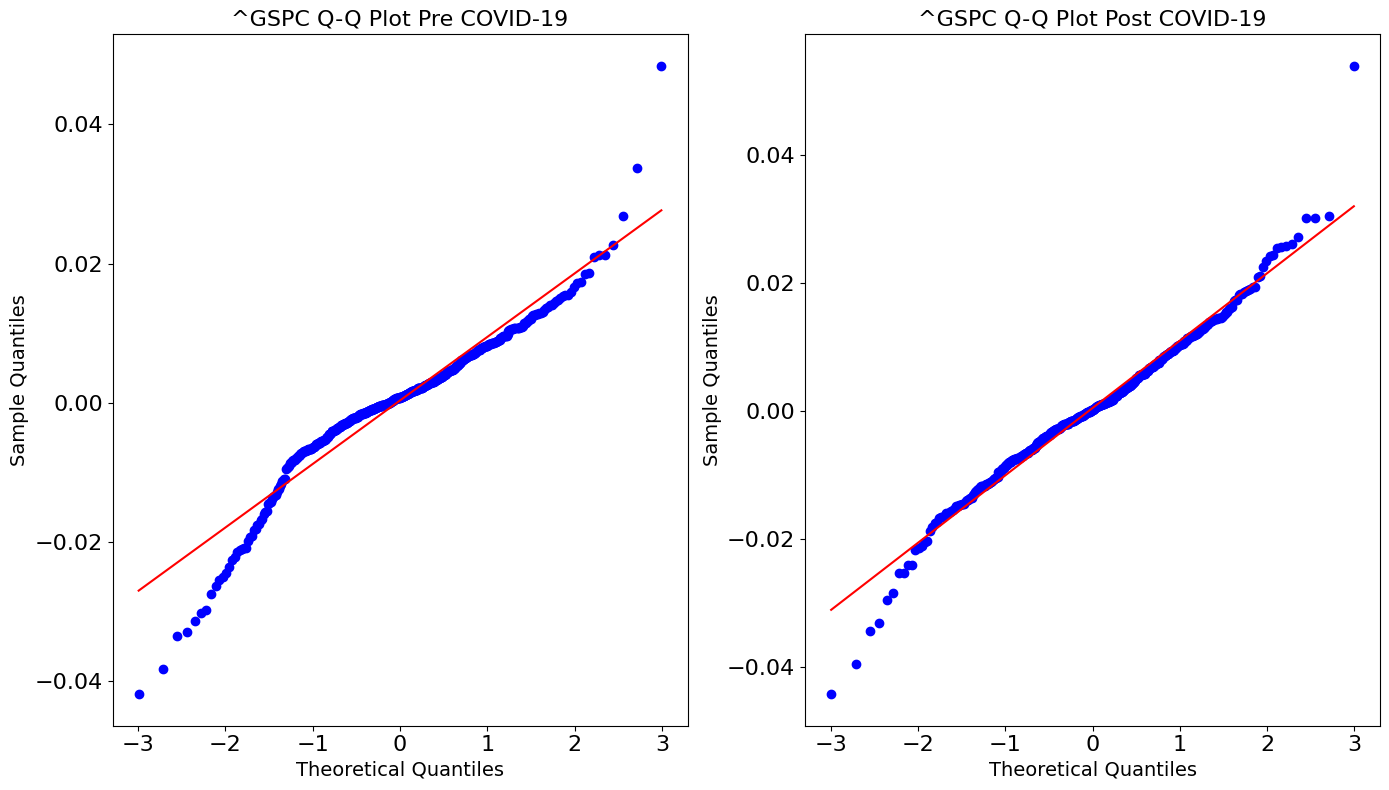

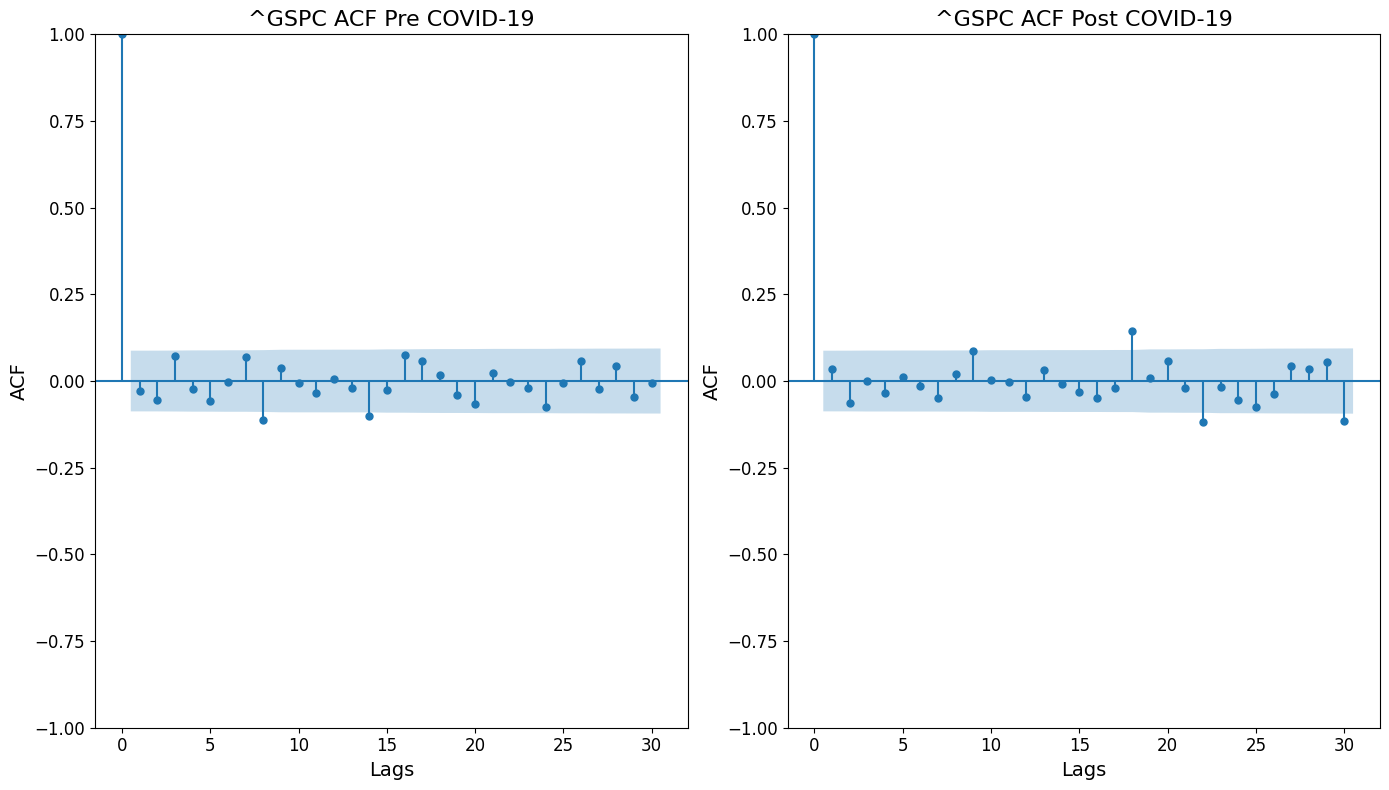

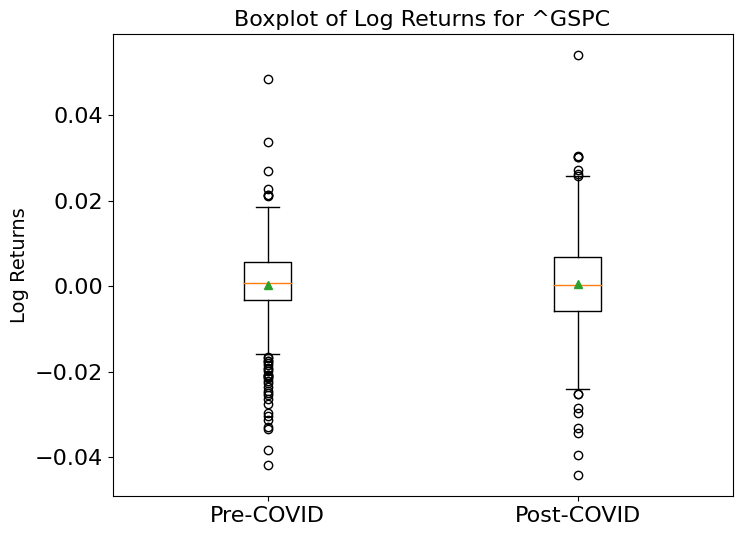

Statistics for ^GSPC:
Pre COVID-19:
  Mean: 0.000345
  Standard Deviation: 0.009
  Skewness: -0.609
  Kurtosis: 3.676
ADF Statistic: -22.962046188814334
p-value: 0.0
Post COVID-19:
  Mean: 0.001
  Standard Deviation: 0.011
  Skewness: -0.004
  Kurtosis: 2.219
ADF Statistic: -21.647247128562107
p-value: 0.0



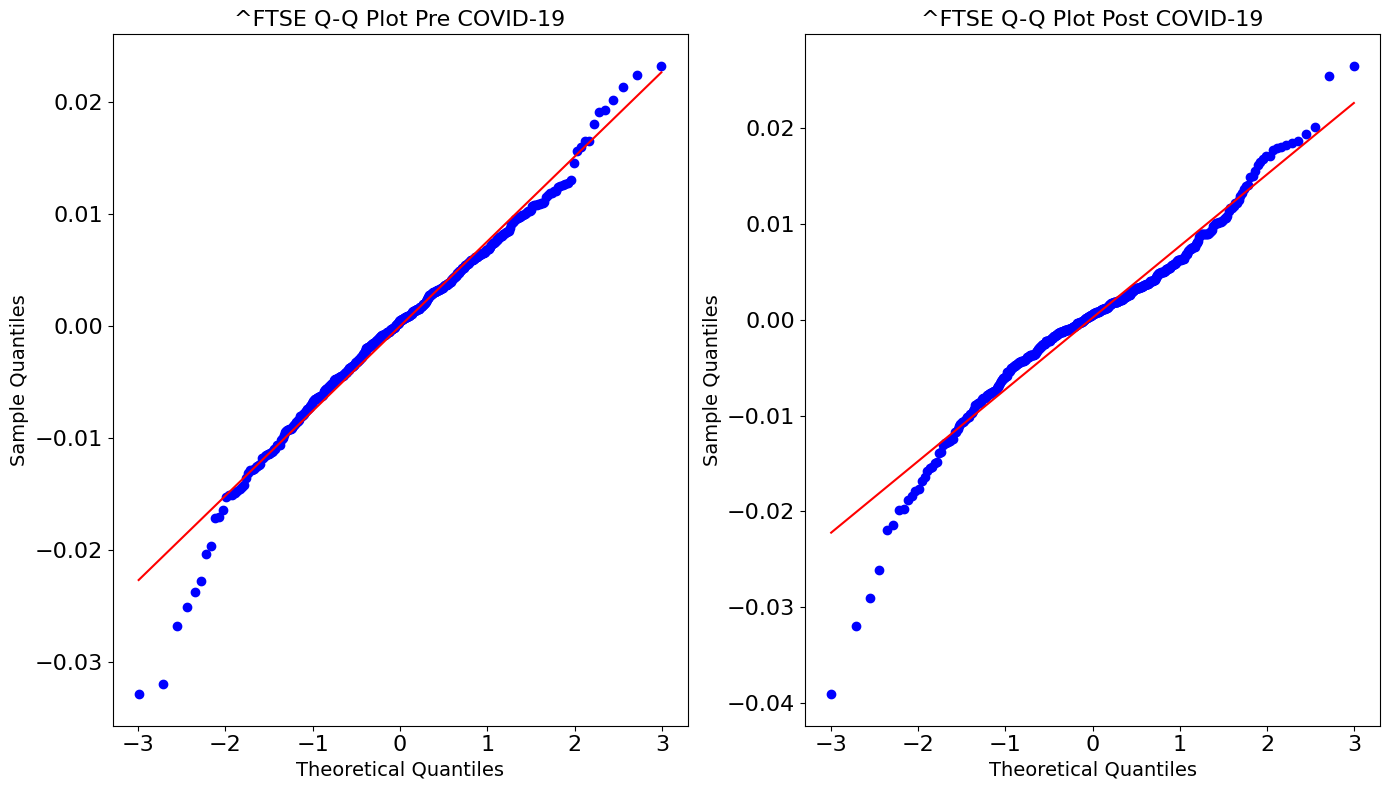

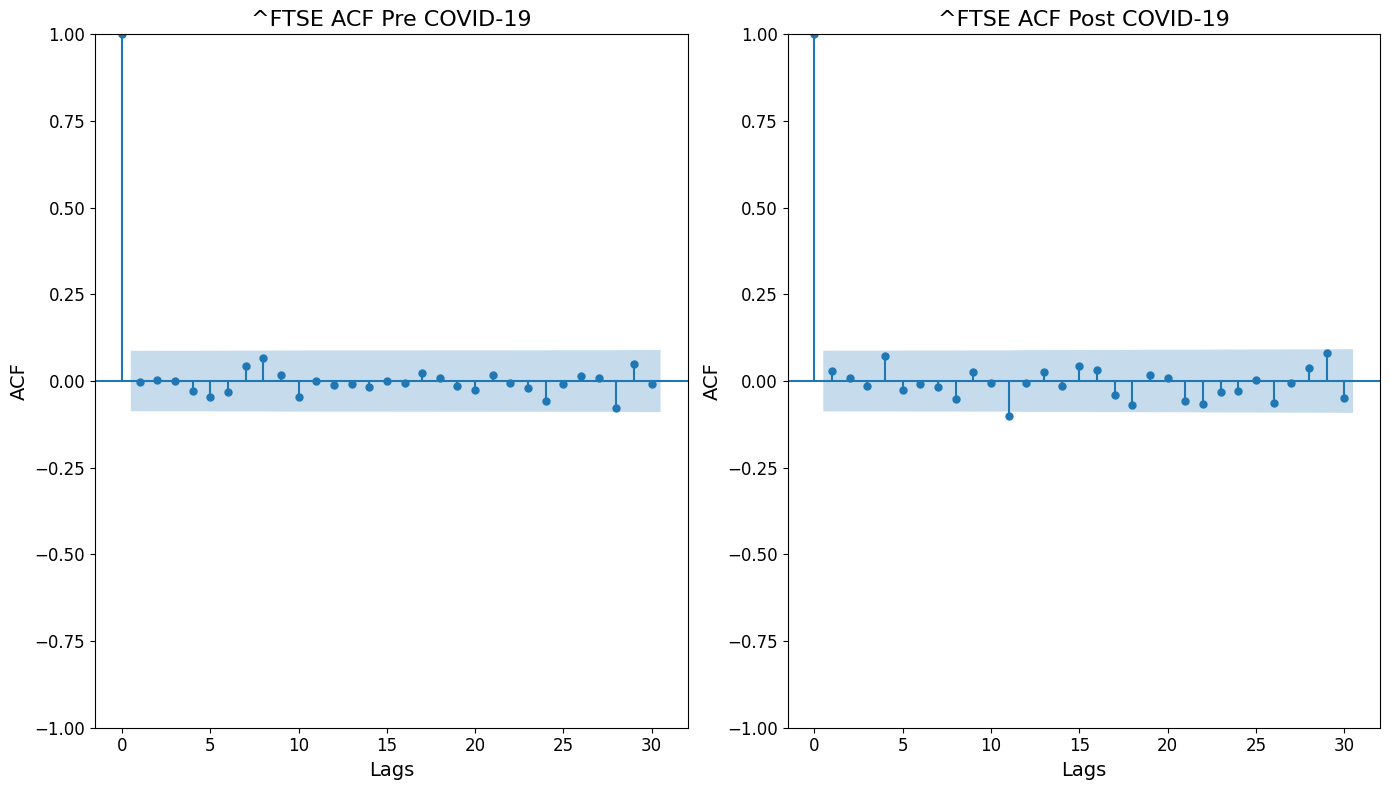

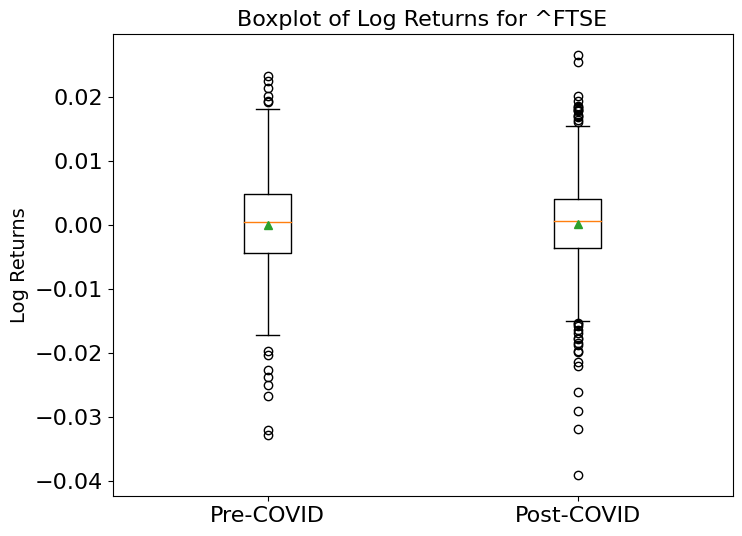

Statistics for ^FTSE:
Pre COVID-19:
  Mean: 0.000012
  Standard Deviation: 0.008
  Skewness: -0.438
  Kurtosis: 1.583
ADF Statistic: -22.421544003785833
p-value: 0.0
Post COVID-19:
  Mean: 0.000
  Standard Deviation: 0.008
  Skewness: -0.512
  Kurtosis: 2.865
ADF Statistic: -21.715788221361816
p-value: 0.0



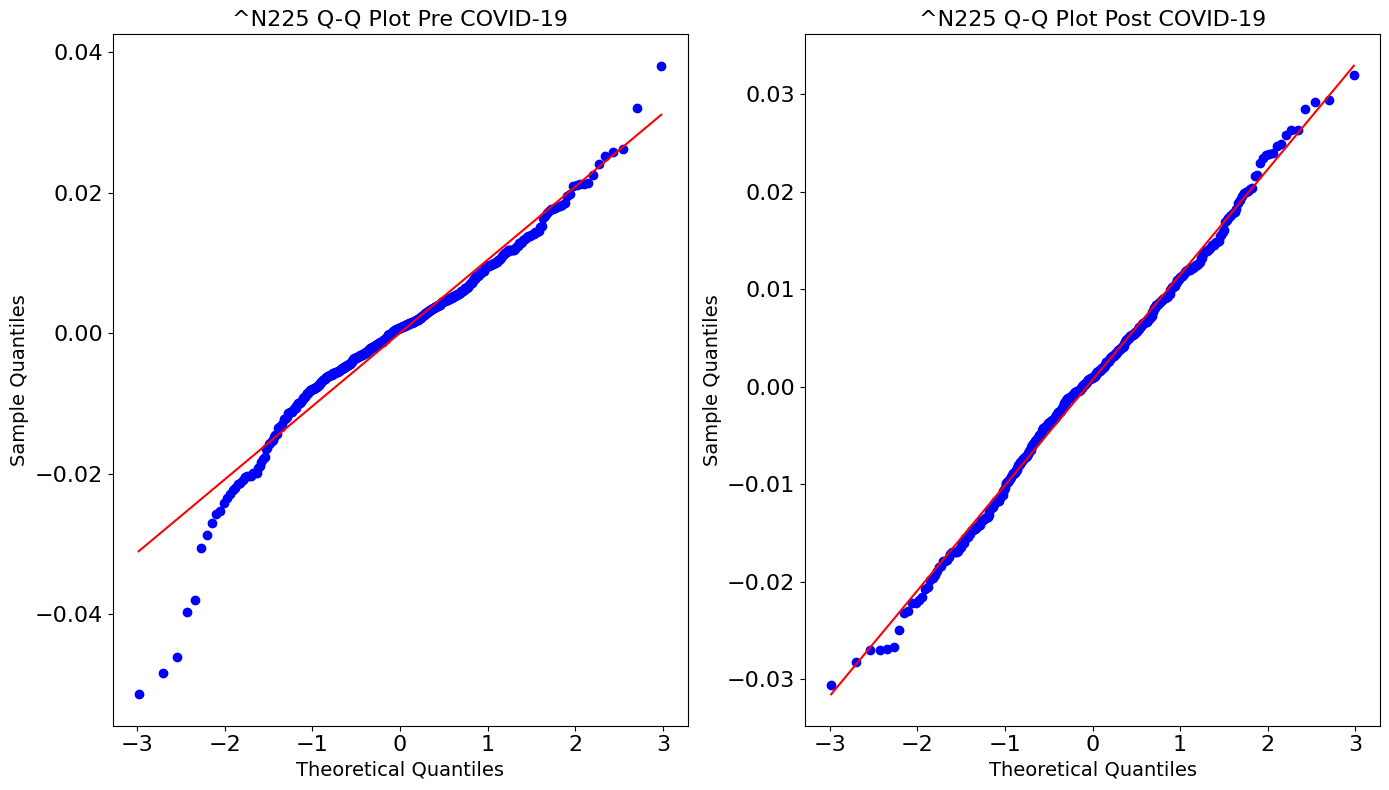

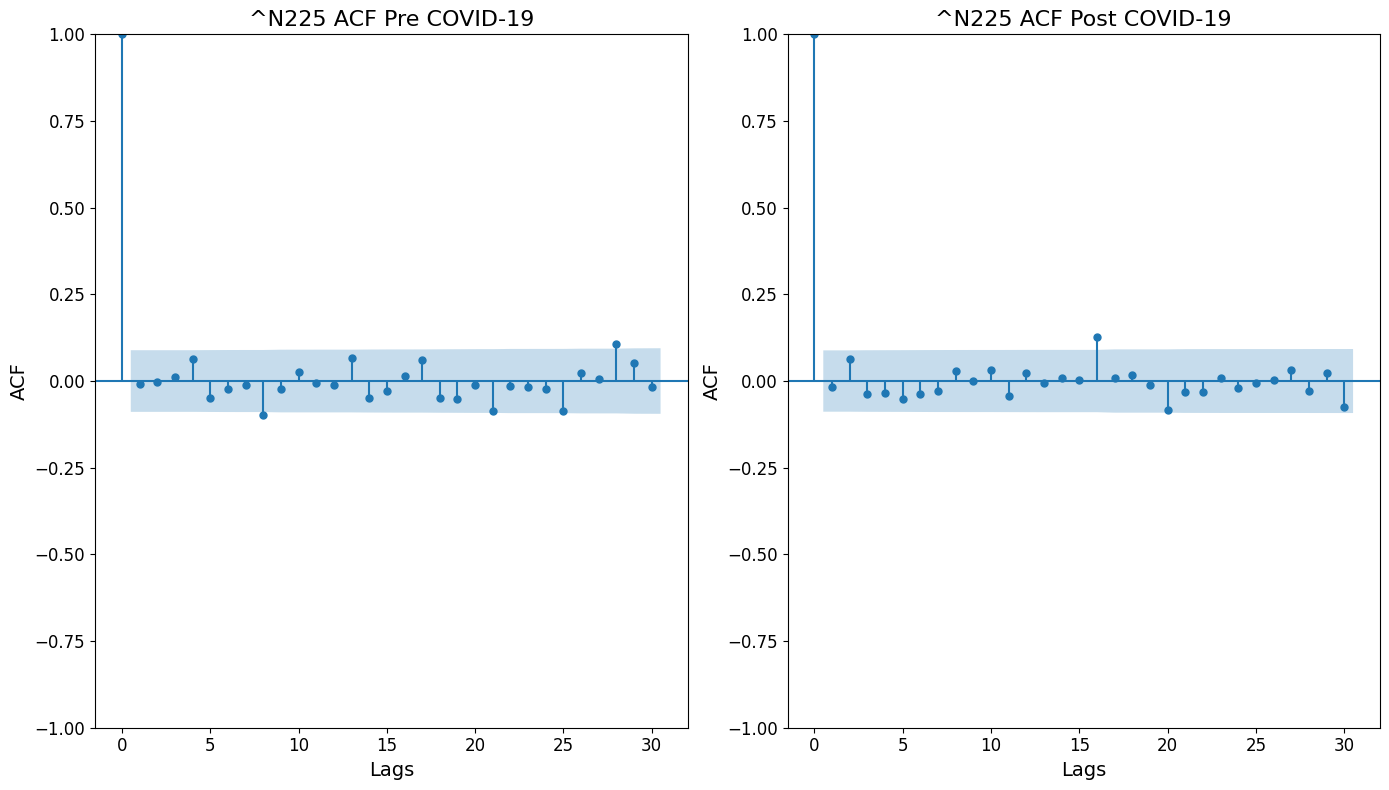

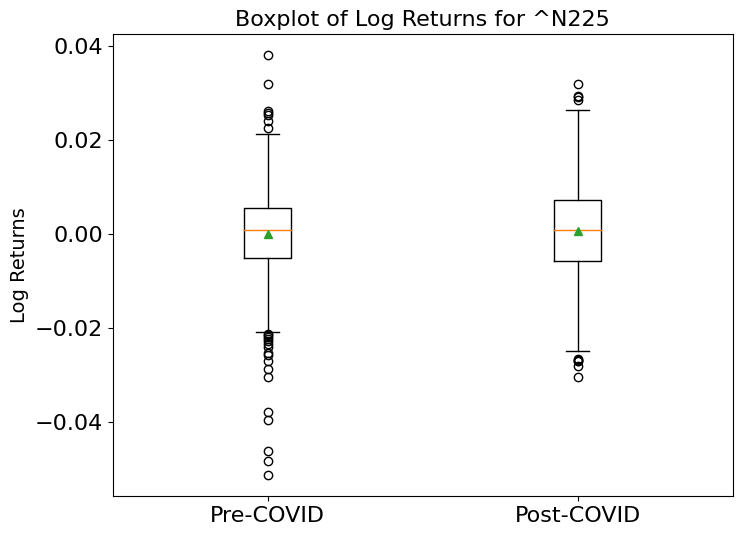

Statistics for ^N225:
Pre COVID-19:
  Mean: 0.000042
  Standard Deviation: 0.011
  Skewness: -0.757
  Kurtosis: 3.156
ADF Statistic: -22.1696469701806
p-value: 0.0
Post COVID-19:
  Mean: 0.001
  Standard Deviation: 0.011
  Skewness: -0.073
  Kurtosis: 0.130
ADF Statistic: -22.433868032556685
p-value: 0.0



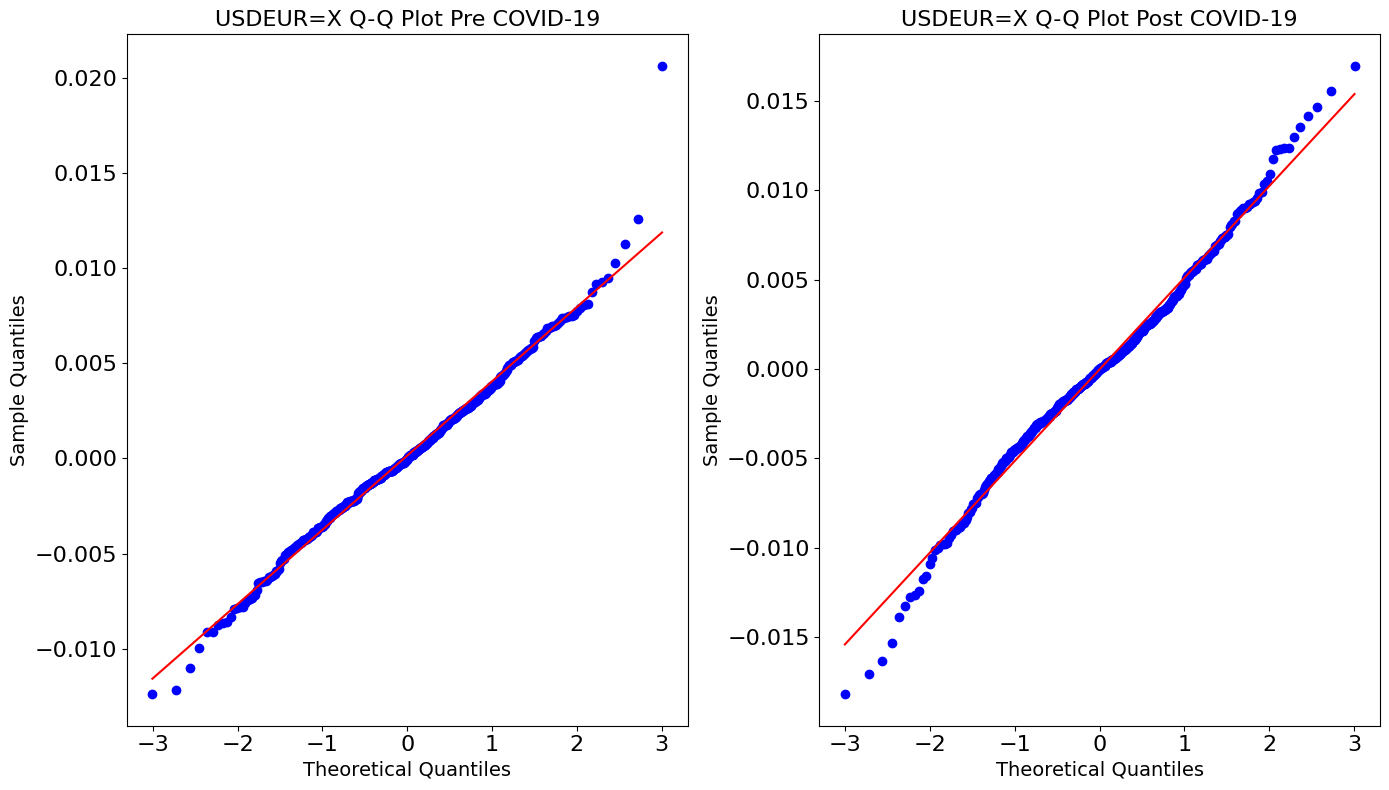

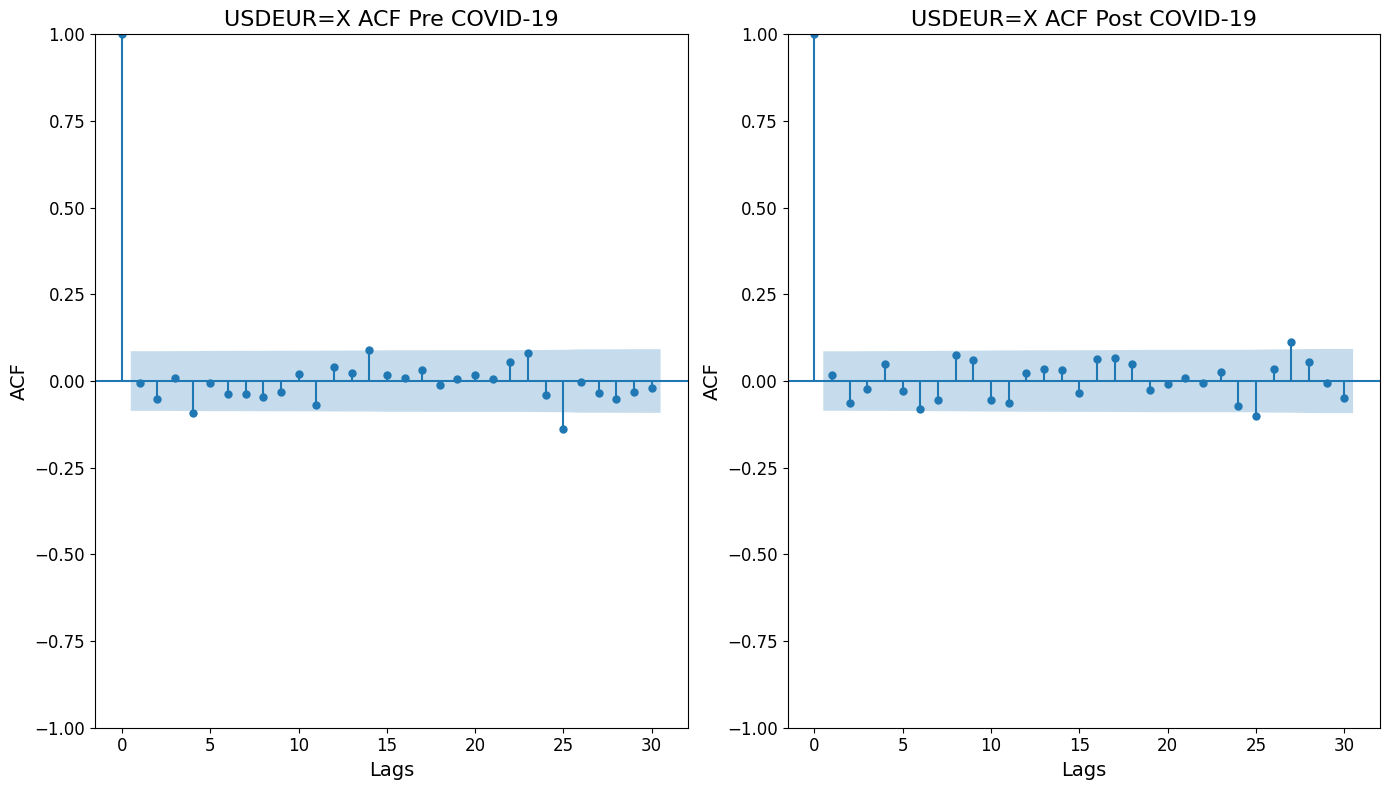

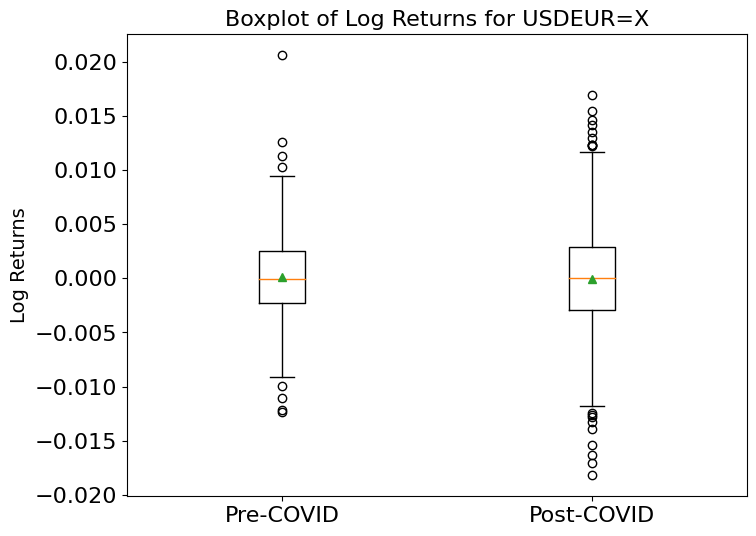

Statistics for USDEUR=X:
Pre COVID-19:
  Mean: 0.000149
  Standard Deviation: 0.004
  Skewness: 0.217
  Kurtosis: 1.464
ADF Statistic: -12.705622513803467
p-value: 1.0566837789058864e-23
Post COVID-19:
  Mean: -0.000
  Standard Deviation: 0.005
  Skewness: -0.052
  Kurtosis: 0.892
ADF Statistic: -16.968152935992368
p-value: 9.201296663163442e-30



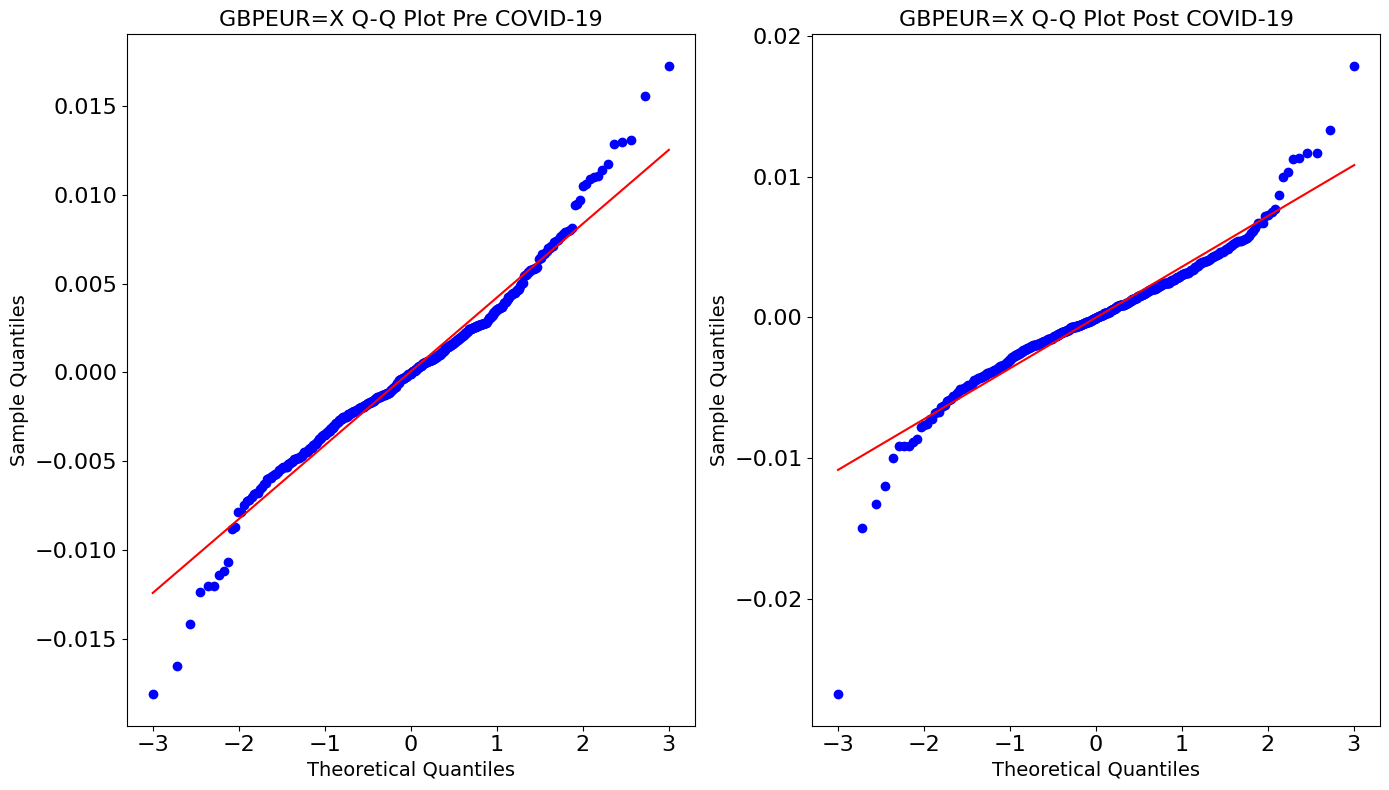

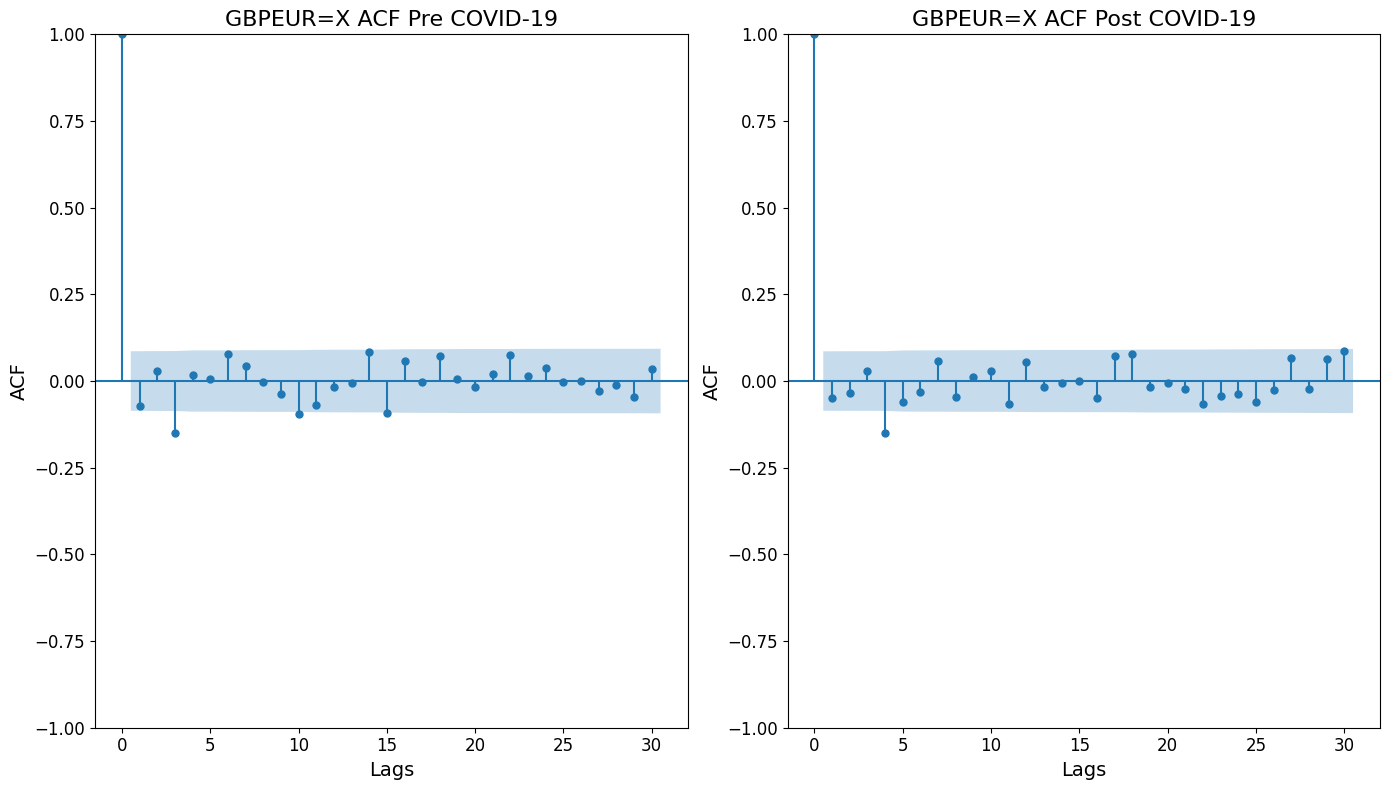

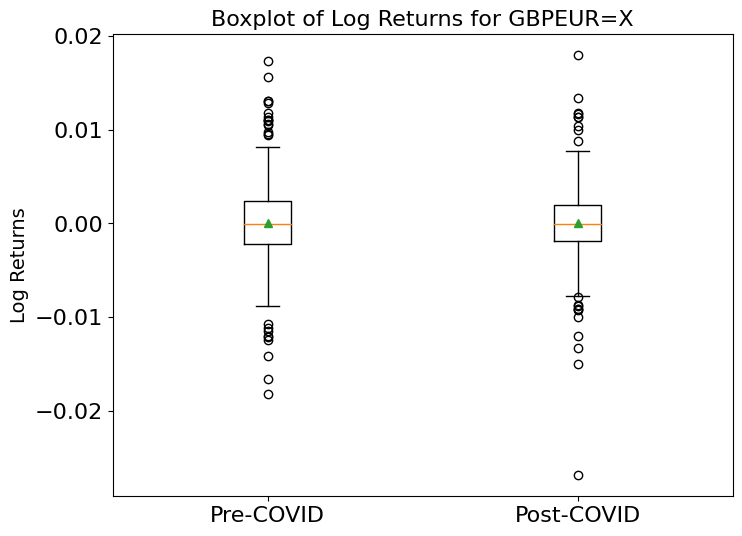

Statistics for GBPEUR=X:
Pre COVID-19:
  Mean: 0.000059
  Standard Deviation: 0.004
  Skewness: 0.104
  Kurtosis: 2.297
ADF Statistic: -15.277299563214308
p-value: 4.629012269787139e-28
Post COVID-19:
  Mean: 0.000
  Standard Deviation: 0.004
  Skewness: -0.538
  Kurtosis: 6.892
ADF Statistic: -12.337577414326994
p-value: 6.222821310001503e-23



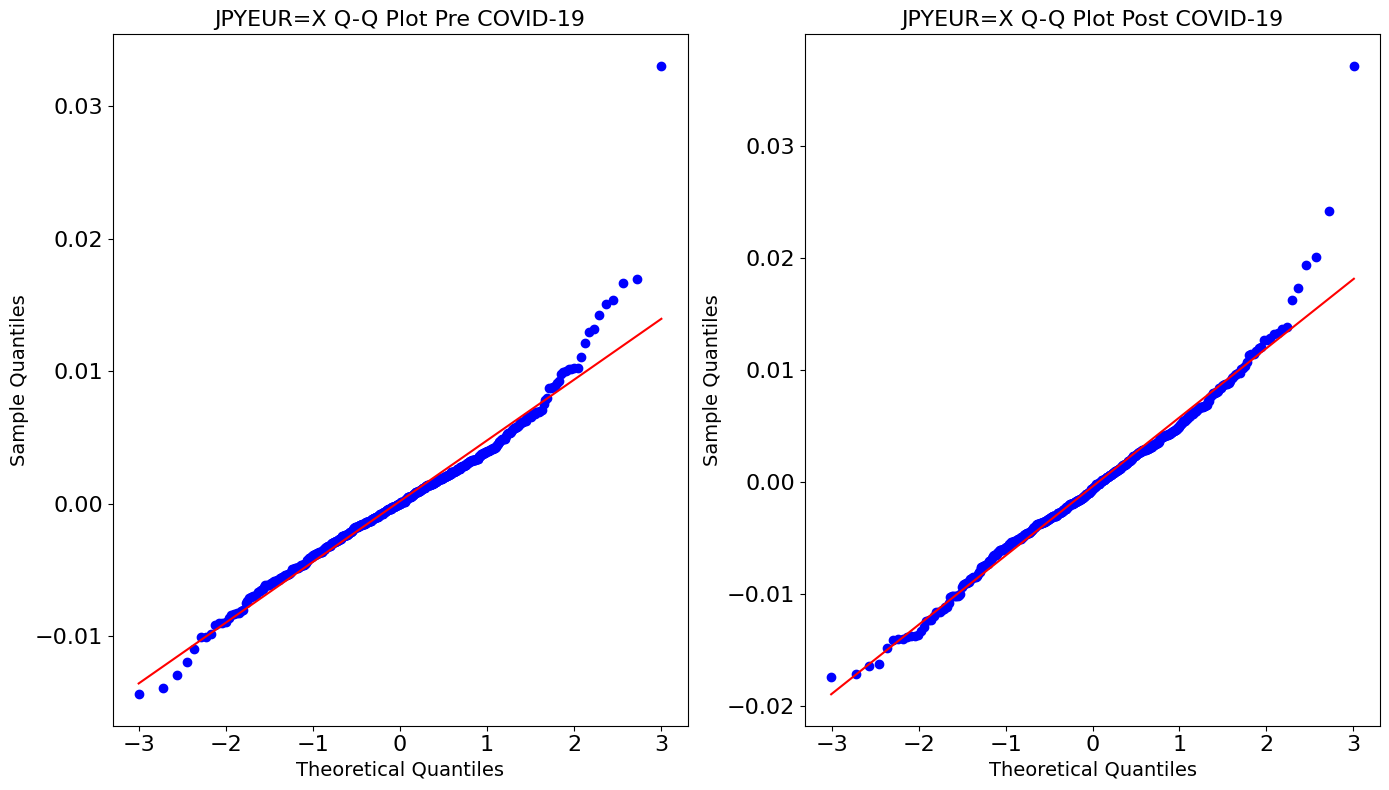

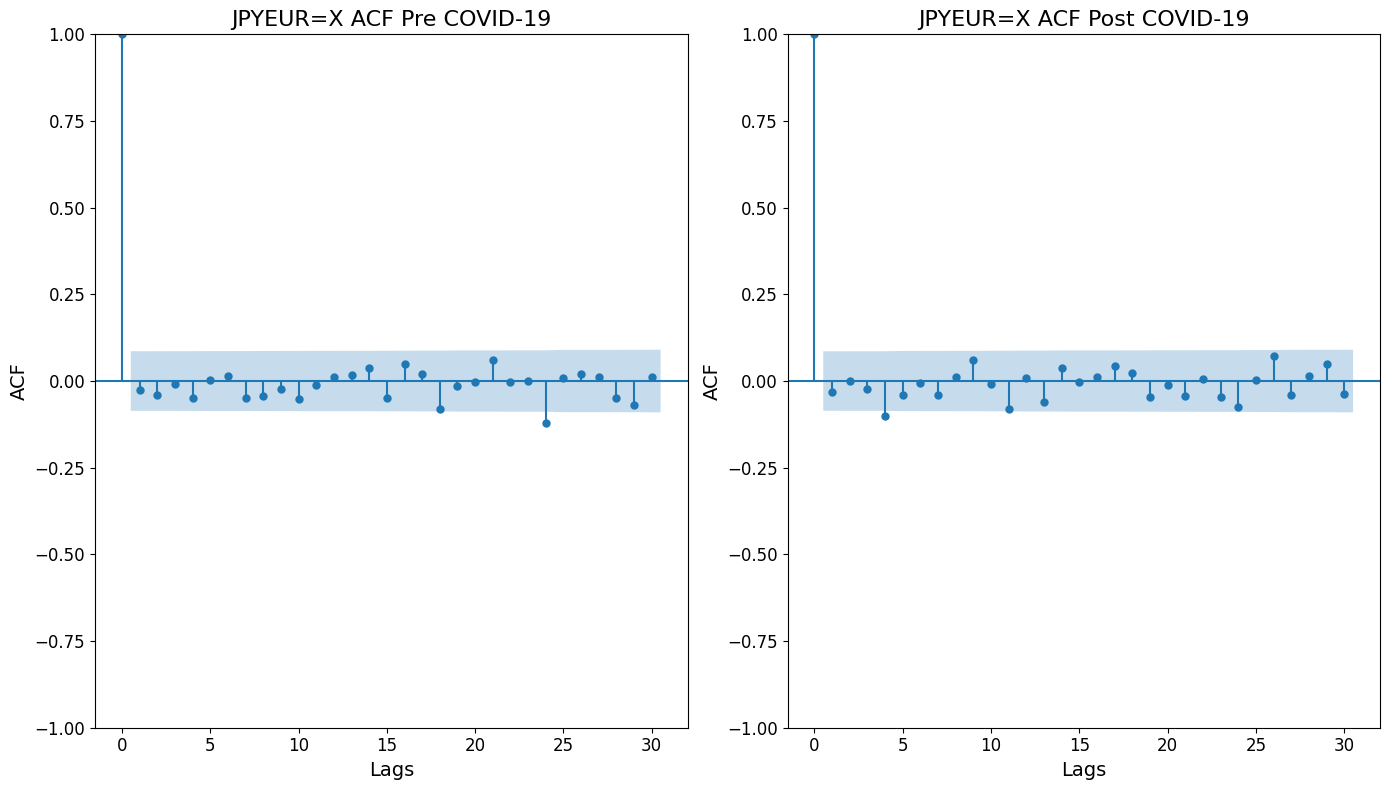

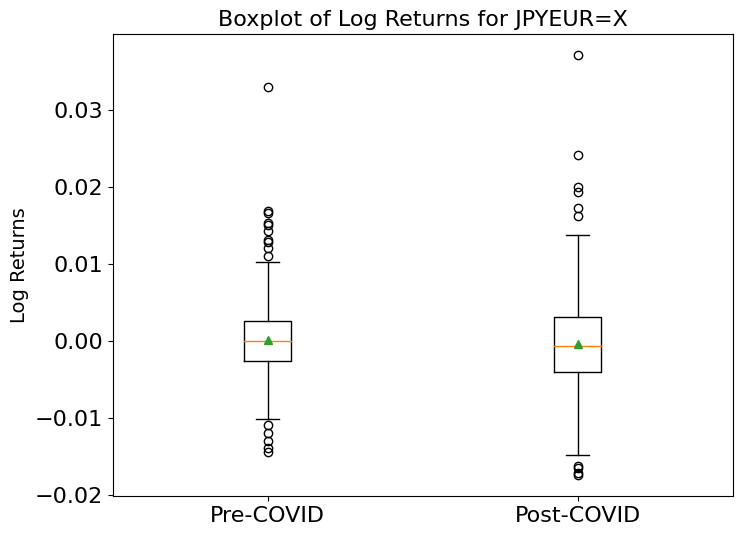

Statistics for JPYEUR=X:
Pre COVID-19:
  Mean: 0.000202
  Standard Deviation: 0.005
  Skewness: 0.893
  Kurtosis: 5.207
ADF Statistic: -23.31149313212971
p-value: 0.0
Post COVID-19:
  Mean: -0.000
  Standard Deviation: 0.006
  Skewness: 0.557
  Kurtosis: 2.819
ADF Statistic: -23.533013678778033
p-value: 0.0



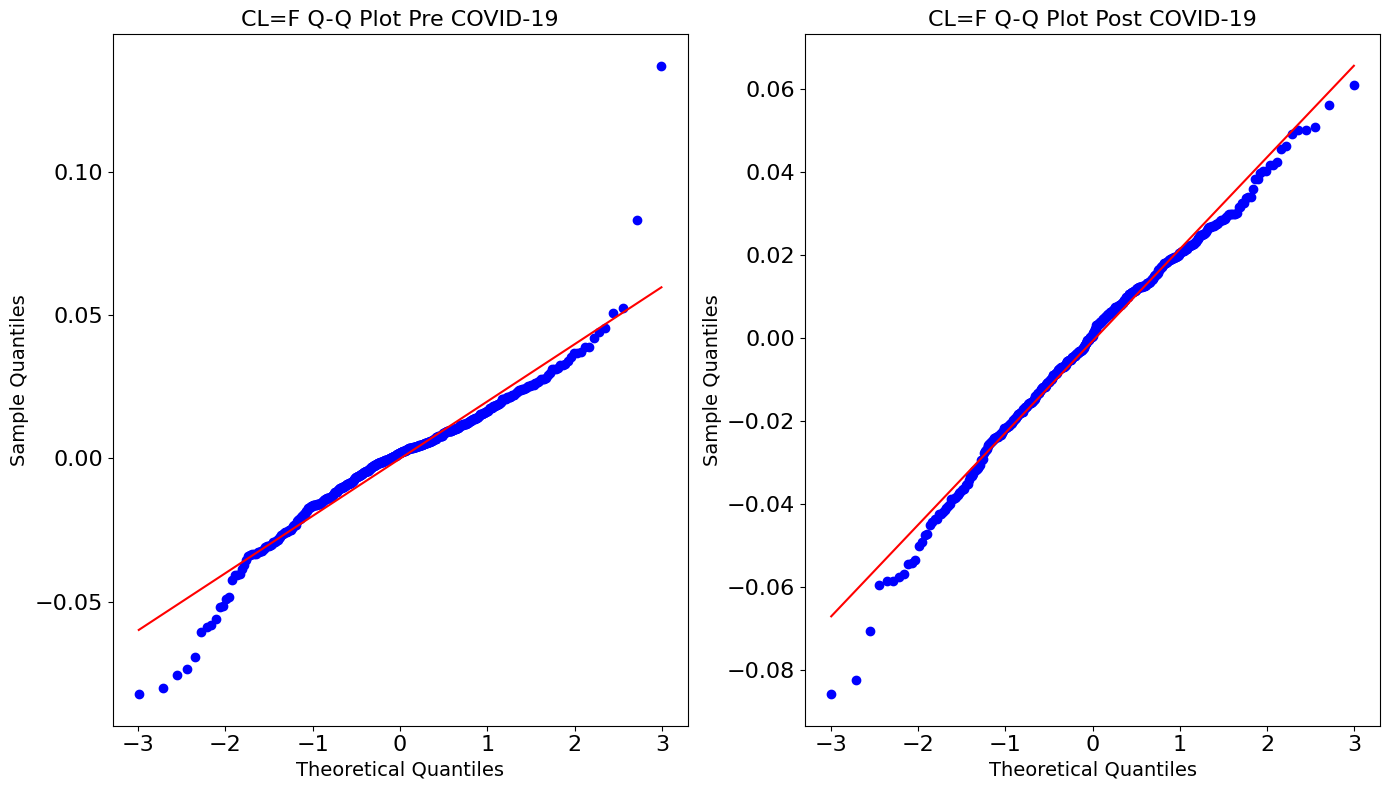

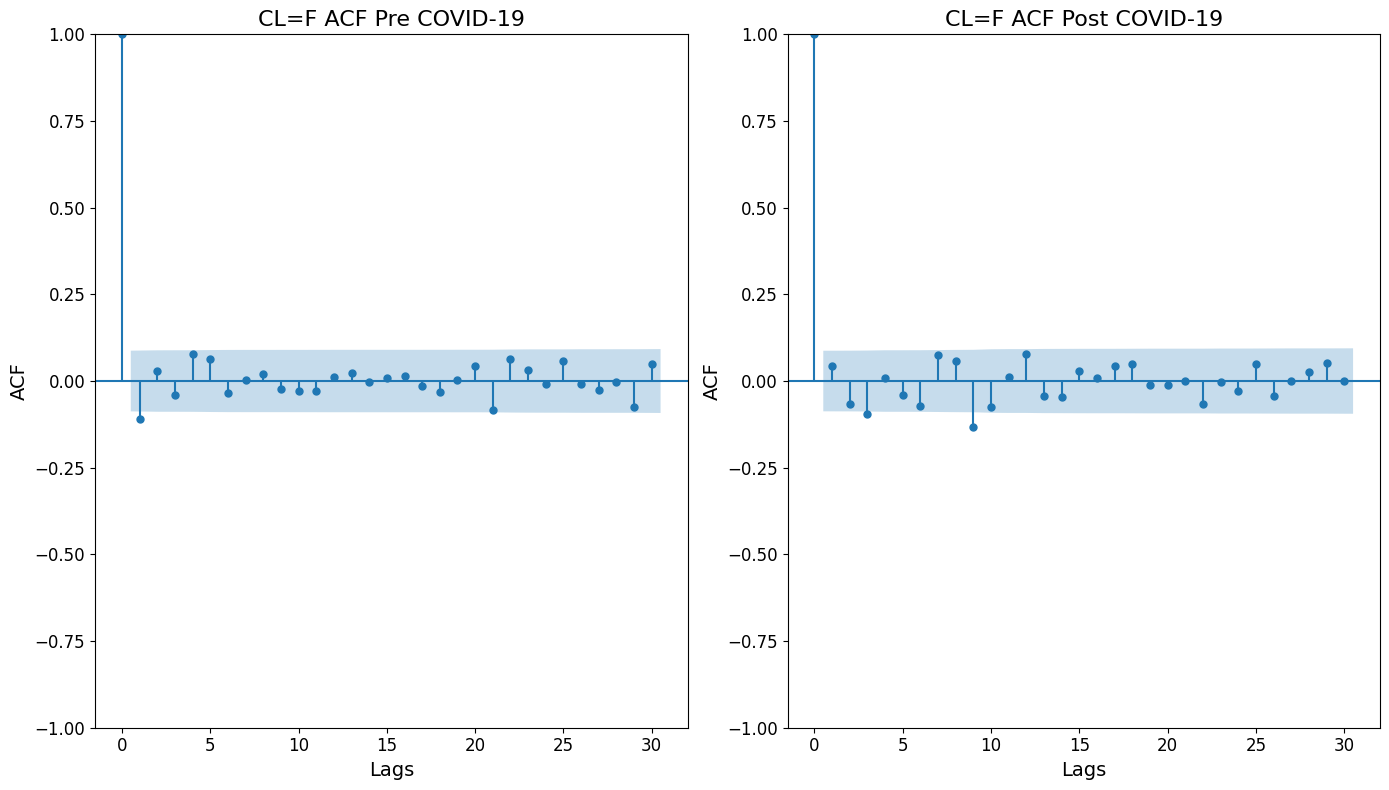

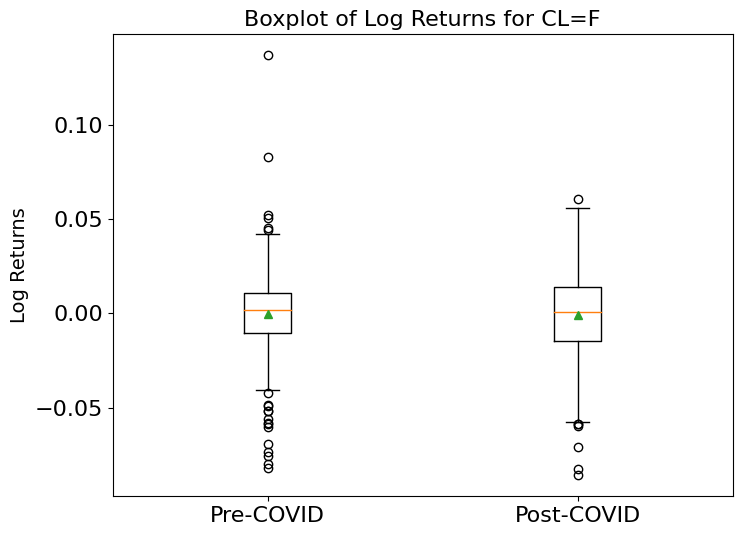

Statistics for CL=F:
Pre COVID-19:
  Mean: -0.000112
  Standard Deviation: 0.021
  Skewness: -0.011
  Kurtosis: 5.434
ADF Statistic: -24.830574622751435
p-value: 0.0
Post COVID-19:
  Mean: -0.001
  Standard Deviation: 0.022
  Skewness: -0.440
  Kurtosis: 0.544
ADF Statistic: -8.648047642229619
p-value: 5.2056474451055316e-14



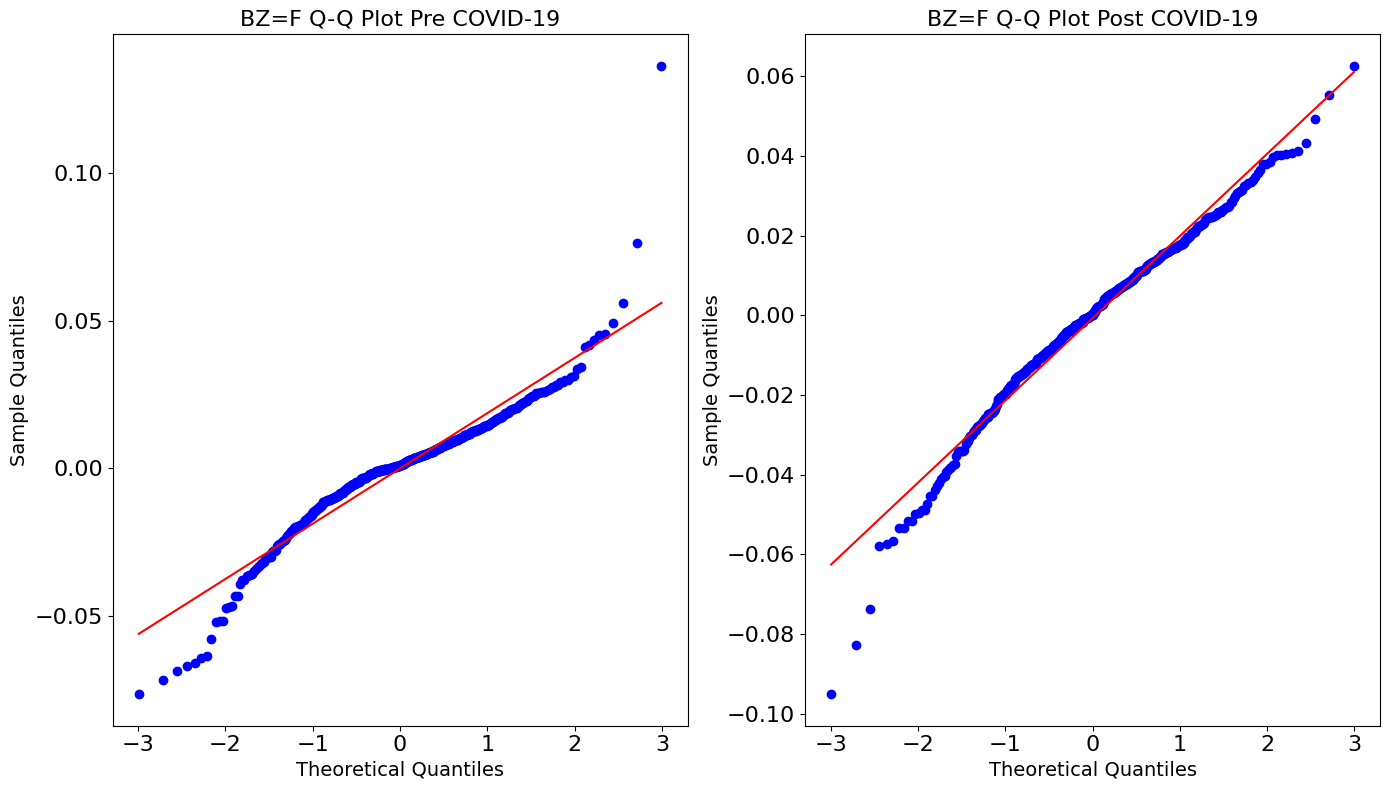

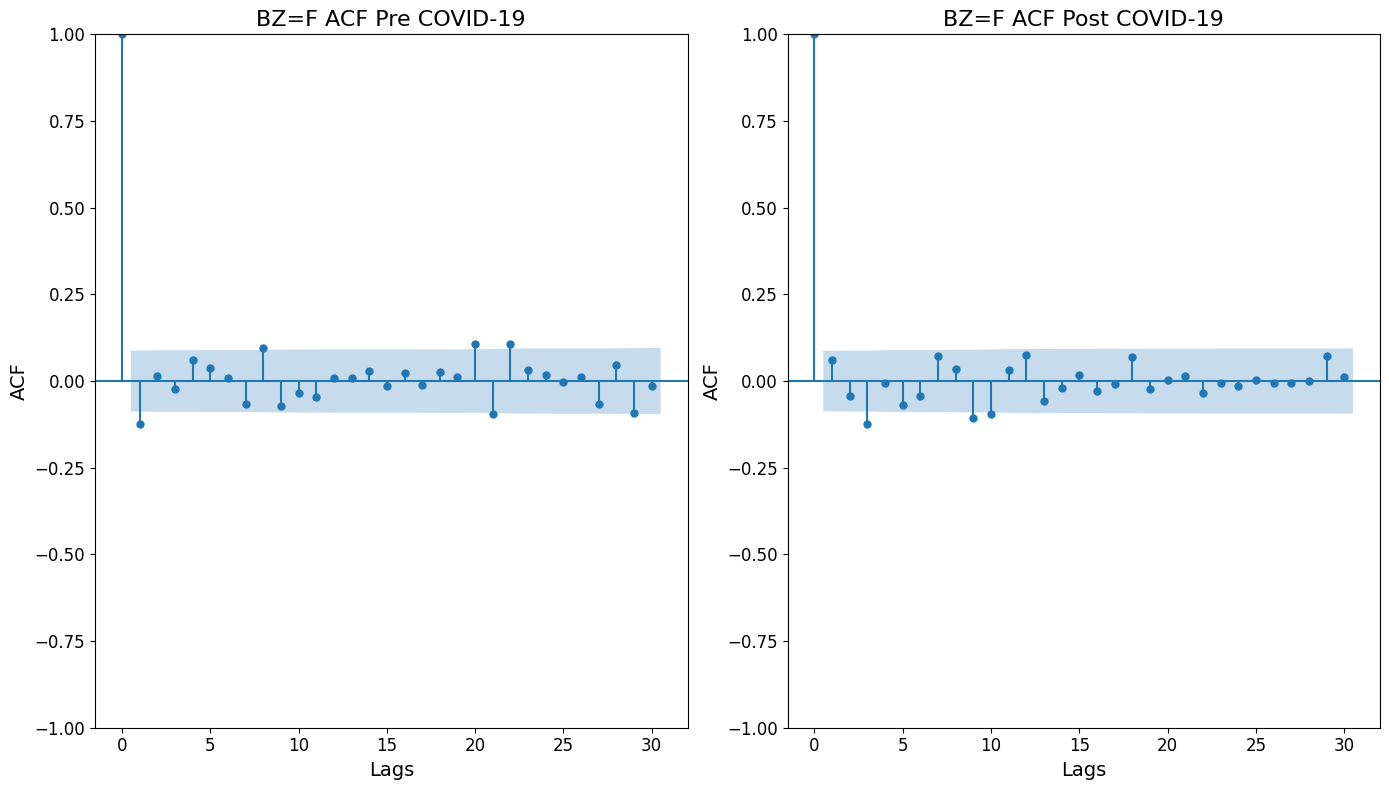

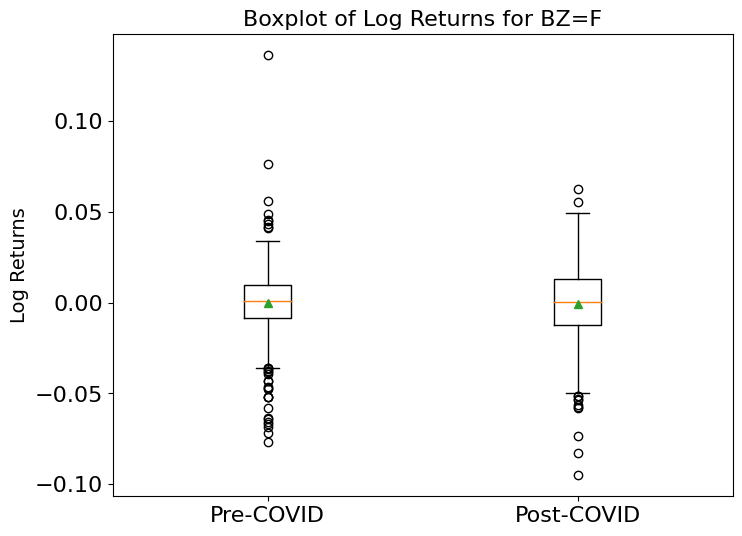

Statistics for BZ=F:
Pre COVID-19:
  Mean: -0.000034
  Standard Deviation: 0.020
  Skewness: 0.017
  Kurtosis: 6.426
ADF Statistic: -25.233920177499527
p-value: 0.0
Post COVID-19:
  Mean: -0.001
  Standard Deviation: 0.021
  Skewness: -0.604
  Kurtosis: 1.330
ADF Statistic: -8.719084531736966
p-value: 3.424264668789817e-14



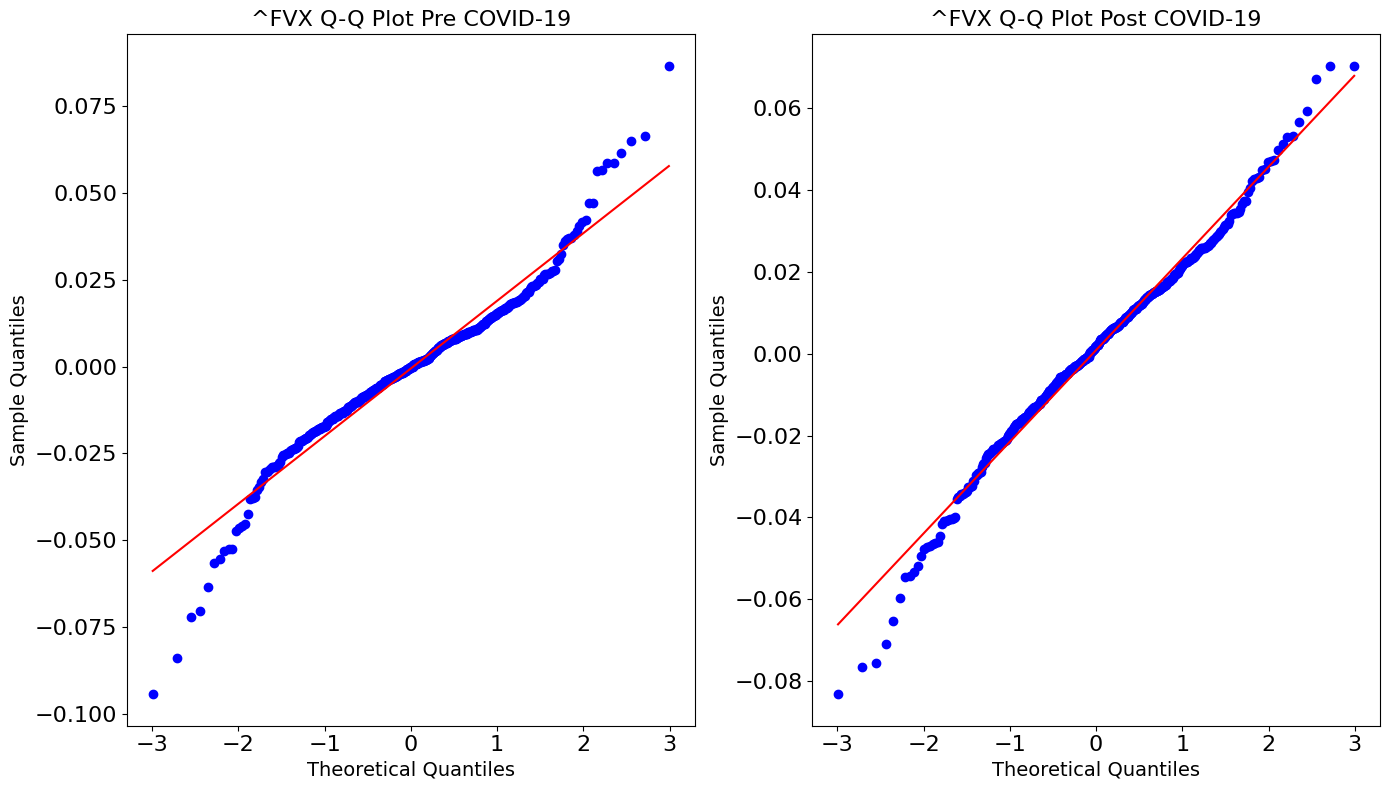

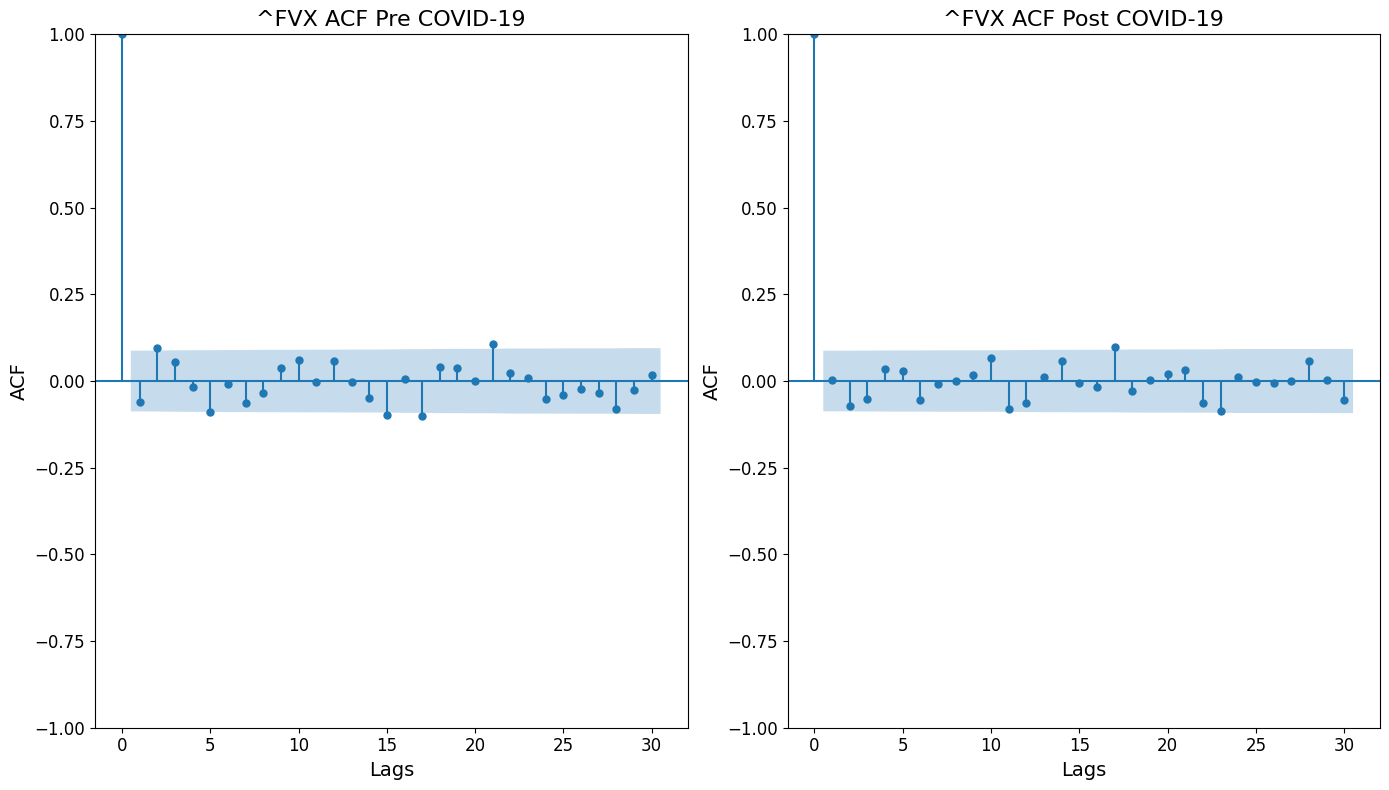

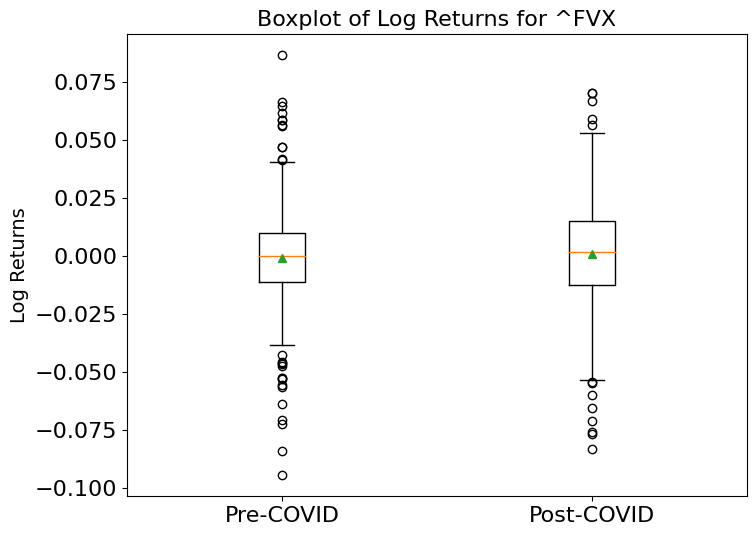

Statistics for ^FVX:
Pre COVID-19:
  Mean: -0.000534
  Standard Deviation: 0.020
  Skewness: -0.204
  Kurtosis: 3.261
ADF Statistic: -10.431551239804241
p-value: 1.6058395445184559e-18
Post COVID-19:
  Mean: 0.001
  Standard Deviation: 0.022
  Skewness: -0.293
  Kurtosis: 1.037
ADF Statistic: -16.908538937616417
p-value: 1.014853628965393e-29



In [ ]:

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Define the stocks and download data
tickers = ["^GSPC", "^FTSE", "^N225", "USDEUR=X", "GBPEUR=X", "JPYEUR=X", "CL=F", "BZ=F", "^FVX"]

# Create lists to store log returns
log_returns_pre_covid_list = []
log_returns_post_covid_list = []

for ticker in tickers:
    asset = yf.Ticker(ticker)

    # Data before COVID-19
    data_pre_covid = asset.history(start="2017-12-01", end="2019-12-01")['Close']
    # Data after COVID-19
    data_post_covid = asset.history(start="2022-06-01", end="2024-06-01")['Close']

    # Calculating log returns
    log_returns_pre_covid = np.log(1 + data_pre_covid.pct_change()).dropna()
    log_returns_post_covid = np.log(1 + data_post_covid.pct_change()).dropna()

    # Append returns to the lists
    log_returns_pre_covid_list.append(log_returns_pre_covid)
    log_returns_post_covid_list.append(log_returns_post_covid)

    # Create a new figure for plotting
    plt.figure(figsize=(14, 8))

    # Q-Q Plot Pre COVID-19
    plt.subplot(1, 2, 1)
    stats.probplot(log_returns_pre_covid, dist="norm", plot=plt)
    plt.title(f'{ticker} Q-Q Plot Pre COVID-19', fontsize=16)
    plt.xlabel('Theoretical Quantiles', fontsize=14)
    plt.ylabel('Sample Quantiles', fontsize=14)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    # Q-Q Plot Post COVID-19
    plt.subplot(1, 2, 2)
    stats.probplot(log_returns_post_covid, dist="norm", plot=plt)
    plt.title(f'{ticker} Q-Q Plot Post COVID-19', fontsize=16)
    plt.xlabel('Theoretical Quantiles', fontsize=14)
    plt.ylabel('Sample Quantiles', fontsize=14)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    plt.tight_layout()
    plt.show()

    # Autocorrelation plot for pre and post COVID-19
    plt.figure(figsize=(14, 8))
    plt.subplot(1, 2, 1)
    sm.graphics.tsa.plot_acf(log_returns_pre_covid, lags=30, ax=plt.gca())
    plt.title(f'{ticker} ACF Pre COVID-19', fontsize=16)
    plt.xlabel('Lags', fontsize=14)
    plt.ylabel('ACF', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.subplot(1, 2, 2)
    sm.graphics.tsa.plot_acf(log_returns_post_covid, lags=30, ax=plt.gca())
    plt.title(f'{ticker} ACF Post COVID-19', fontsize=16)
    plt.xlabel('Lags', fontsize=14)
    plt.ylabel('ACF', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.tight_layout()
    plt.show()

    # Boxplot of pre and post COVID returns
    plt.figure(figsize=(8, 6))
    plt.boxplot([log_returns_pre_covid, log_returns_post_covid], labels=['Pre-COVID', 'Post-COVID'], showmeans=True)
    plt.title(f'Boxplot of Log Returns for {ticker}', fontsize=16)
    plt.ylabel('Log Returns', fontsize=14)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

    # Calculate statistics
    def calculate_statistics(log_returns):
        mean = np.mean(log_returns)
        std_dev = np.std(log_returns)
        skewness = np.mean((log_returns - mean) ** 3) / (std_dev ** 3)
        kurtosis = np.mean((log_returns - mean) ** 4) / (std_dev ** 4) - 3
        adf_result = adfuller(log_returns)
        return mean, std_dev, skewness, kurtosis, adf_result

    mean_pre, std_dev_pre, skewness_pre, kurtosis_pre, stationarity_pre = calculate_statistics(log_returns_pre_covid)
    mean_post, std_dev_post, skewness_post, kurtosis_post, stationarity_post = calculate_statistics(log_returns_post_covid)

    # Print results
    print(f"Statistics for {ticker}:")
    print("Pre COVID-19:")
    print(f"  Mean: {mean_pre:.6f}")
    print(f"  Standard Deviation: {std_dev_pre:.3f}")
    print(f"  Skewness: {skewness_pre:.3f}")
    print(f"  Kurtosis: {kurtosis_pre:.3f}")
    print(f"ADF Statistic: {stationarity_pre[0]}")
    print(f"p-value: {stationarity_pre[1]}")

    print("Post COVID-19:")
    print(f"  Mean: {mean_post:.3f}")
    print(f"  Standard Deviation: {std_dev_post:.3f}")
    print(f"  Skewness: {skewness_post:.3f}")
    print(f"  Kurtosis: {kurtosis_post:.3f}")
    print(f"ADF Statistic: {stationarity_post[0]}")
    print(f"p-value: {stationarity_post[1]}")
    print()

